<a href="https://colab.research.google.com/github/garciapg/Dynamic-Pricing-Strategy-for-Used-Devices-using-Linear-Regression/blob/main/ReCell_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dynamic Pricing Strategy for Used Devices using Linear Regression

## Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/1 Data Science/Project 3 - Linear regression/used_device_data.csv'
df = pd.read_csv(path)

## Data Overview

### General

In [ ]:
df.shape

(3454, 15)

There are 3.454 rows and 15 columns

In [ ]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [ ]:
df.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


- Mean normalized used price and normalized new price were 4.36, and 5.23 respectively.
- Mean main camera mp and selfie camera mp are 9.5mp and 6.6mp respectively.
- Mean internal memory and RAM are 54.6gb, and 4gb respectively.
- Mean battery is 3.133 mAh.
- Mean weight is 182.8g
- Mean release year was 2016.
- Mean days used was 674.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

All variables have the right data type.

main_camera_mp, selfie_camera_mp, int_memory, ram, battery, and weight have missing values. main_camera_mp has the highest number of missing values, the rest have <10 missing values

### Duplicated Values

In [ ]:
duplicates = df[df.duplicated()]
duplicates

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price


There are no duplicates

## Exploratory Data Analysis (EDA)

### Univariate Analysis

#### Numerical

First, I'll use a function to plot the histogram and boxplot together.

In [ ]:
def histbox(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

##### **normalized used price**

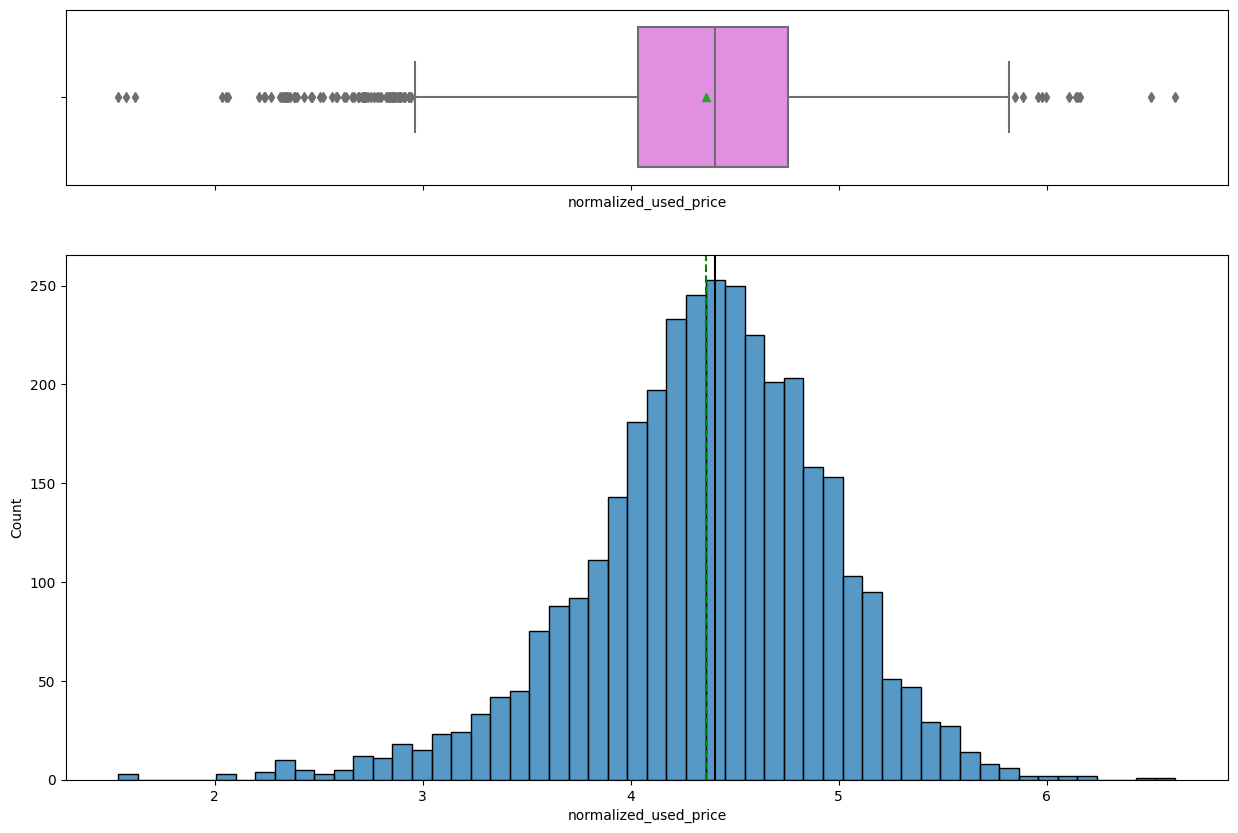

In [ ]:
histbox(df, 'normalized_used_price')

- The distribution looks quite normal in the center with a small skewness to the left, some of it due to the outliers.
- The average and Median used price is around 4.3.
- Even though there are a lot of outliers in the boxplot, the histogram shows that the frequencies of the outliers are nothing out of the ordinary; values far from the center or the mean, are much less frequent than the rest.

##### **normalized new price**

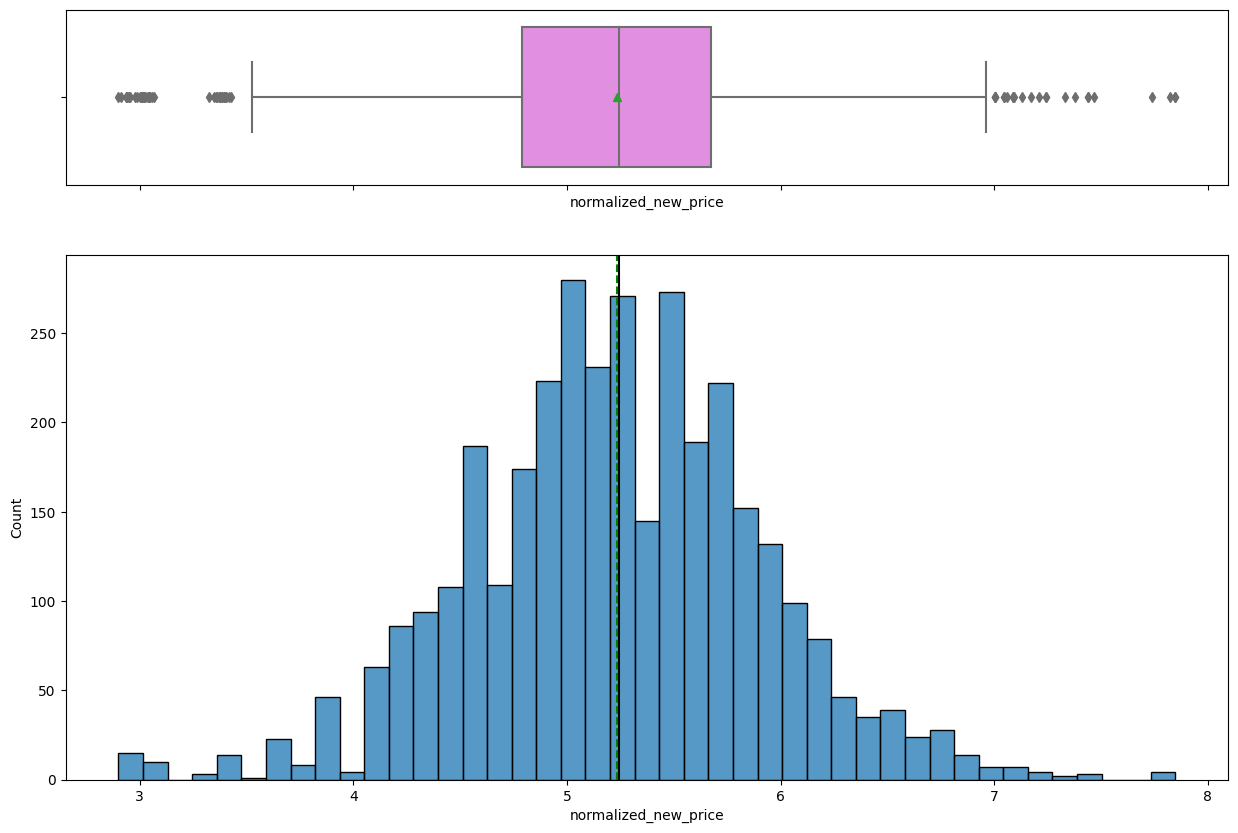

In [ ]:
histbox(df, 'normalized_new_price')

- This one looks less normal, with more variance.
- No significant visible skewness.
- As expected, the new average price (5.2) is higher compared to the used price (4.3).
- The minimum price recorded is just below 3, and the max price is just below 8, both are higher than the highest and lowest used prices.

##### **screen size**

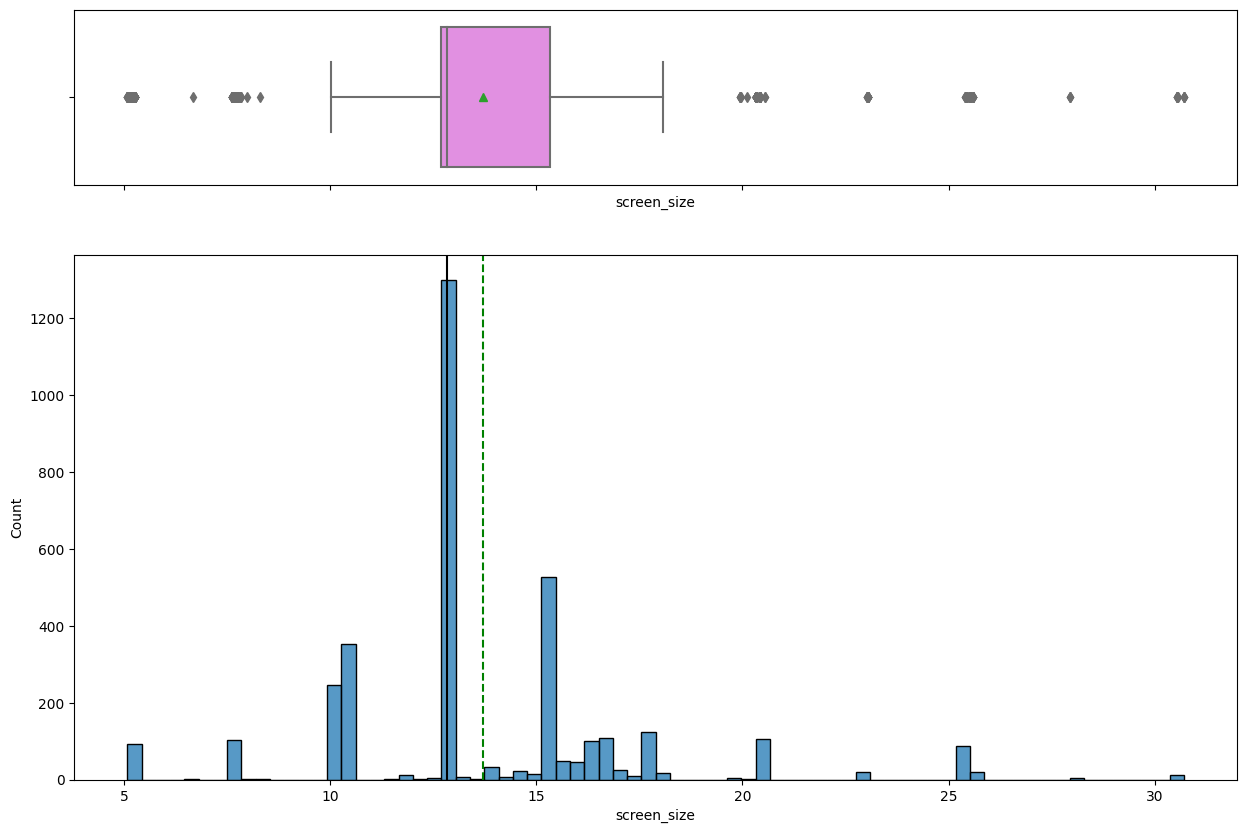

In [ ]:
histbox(df, 'screen_size')

- There are certain screen sizes dominating over the others. But this is expected and normal.
- Most screens fall between 10cm and 17cm screen size.

##### **main camera mp**

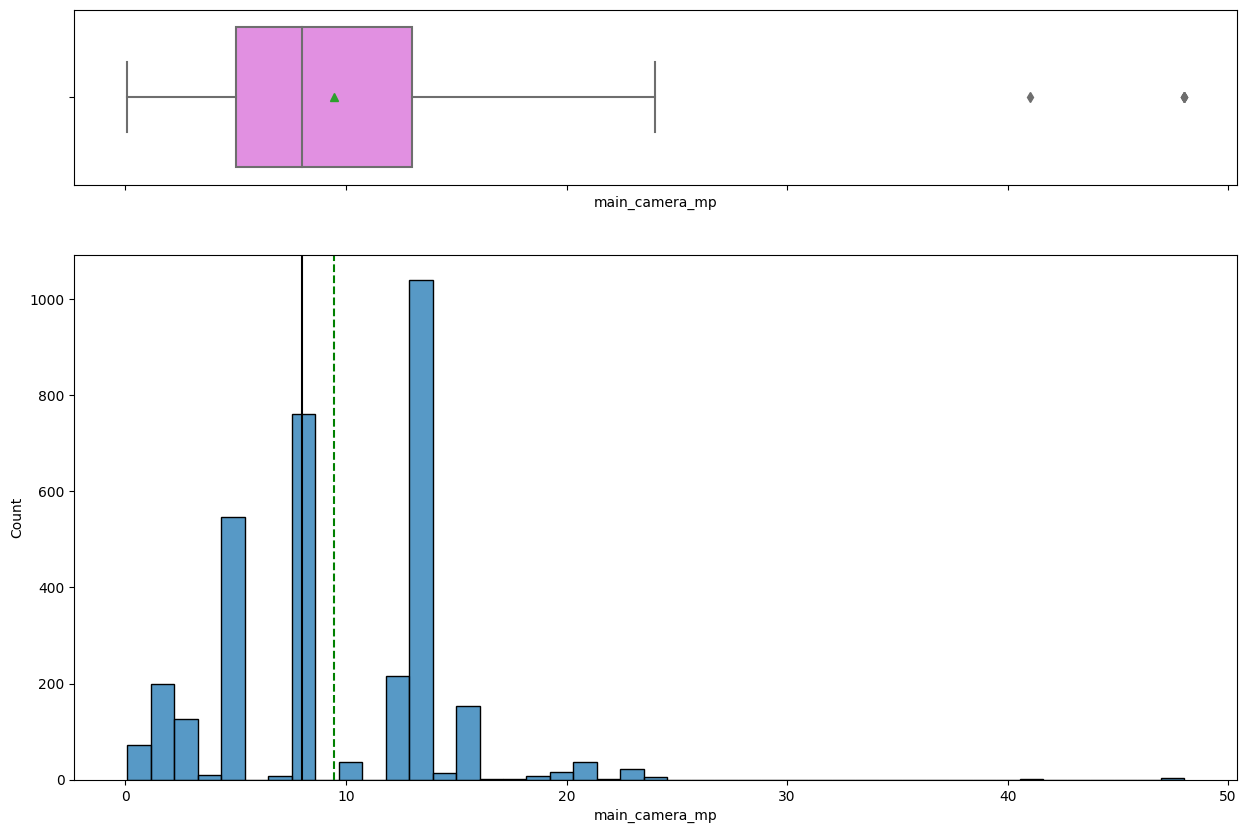

In [ ]:
histbox(df, 'main_camera_mp')

- The distribution is right-skewed, some of that because of some outliers that have megapixels in the 40s and 50s range.
- Average megapixels are around 8mp.
- There are no phones with 0 megapixels and most are between 1mp and 17mp approximately.

##### **selfie camera mp**

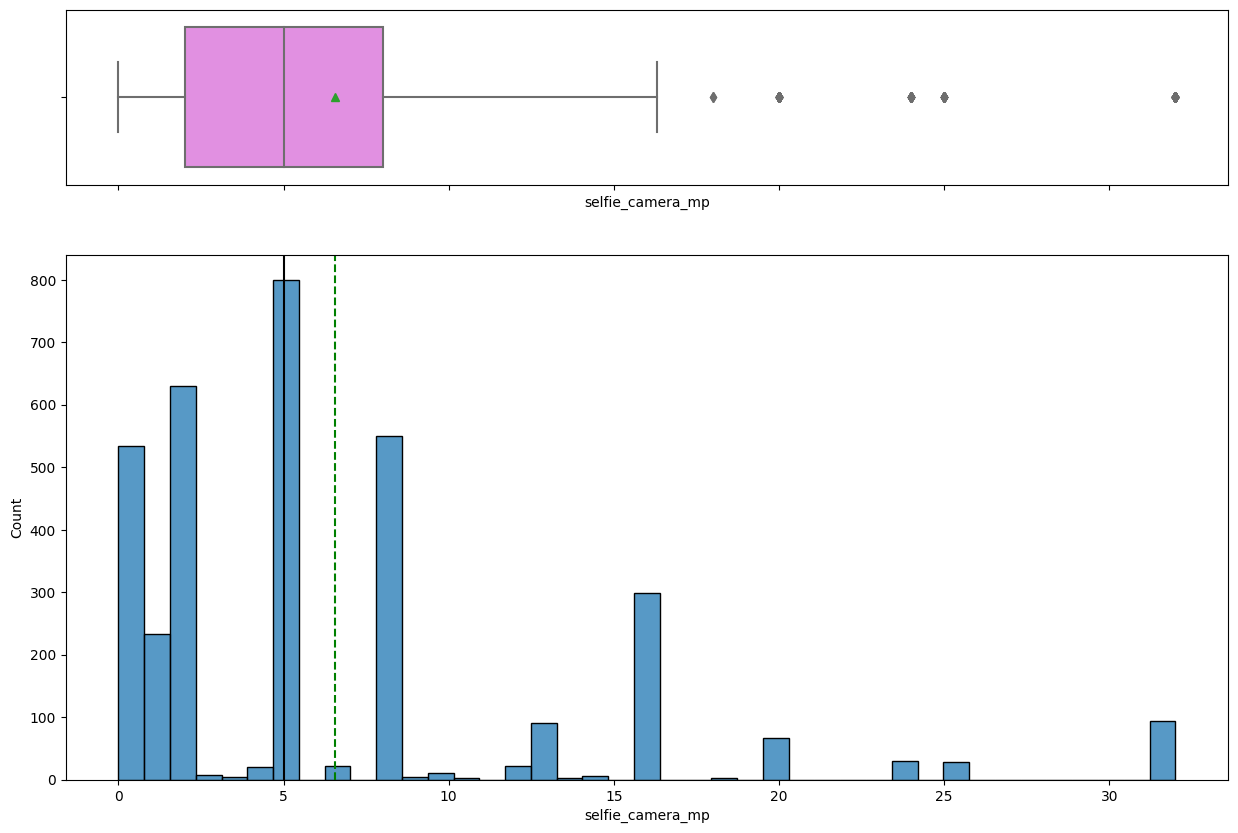

In [ ]:
histbox(df, 'selfie_camera_mp')

- As expected, the average resolution is lower compared to the main camera.
- The distribution is skewed to the right.

##### **int memory**

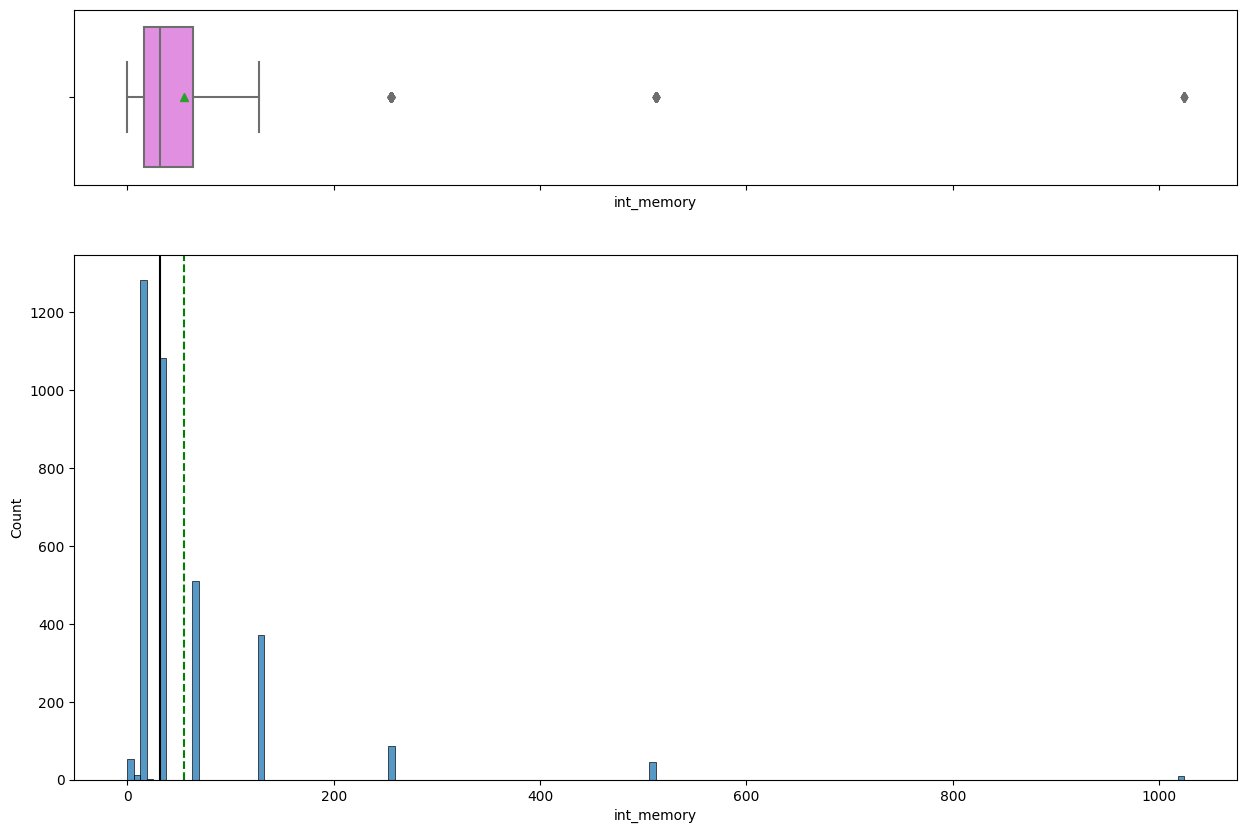

In [ ]:
histbox(df, 'int_memory')

- The distribution is skewed to the right.
- Most phones are close to average internal memory.
- The outliers are very few, but very far from average. Those should be investigated.

In [ ]:
# Let's check
memory_400 = df[df['int_memory'] > 1000]
memory_400

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
644,Apple,iOS,30.71,yes,no,12.00,7.0,1024.0,4.0,9720.0,631.0,2018,543,5.808022,7.003847
645,Apple,iOS,27.94,yes,no,12.00,7.0,1024.0,4.0,7812.0,468.0,2018,525,6.158969,6.778899
772,Asus,Android,12.70,no,no,8.00,0.3,1024.0,4.0,2500.0,160.0,2014,860,3.523120,4.594413
791,Asus,Android,10.34,no,no,13.00,1.2,1024.0,4.0,1820.0,126.0,2014,772,5.494953,5.555012
1468,Lava,Android,10.16,no,no,2.00,0.3,1024.0,4.0,1400.0,113.0,2013,595,2.978077,3.934958
1940,Micromax,Android,10.08,no,no,3.15,0.3,1024.0,4.0,1450.0,118.0,2013,836,3.437208,4.503912
2251,Others,Android,12.70,no,no,5.00,0.3,1024.0,4.0,2200.0,170.0,2013,584,4.070905,5.135798
2355,Samsung,Android,15.34,yes,no,12.00,9.0,1024.0,4.0,4100.0,175.0,2019,291,5.569718,6.957269


- The values seem real, so no need to treat them.

##### **ram**

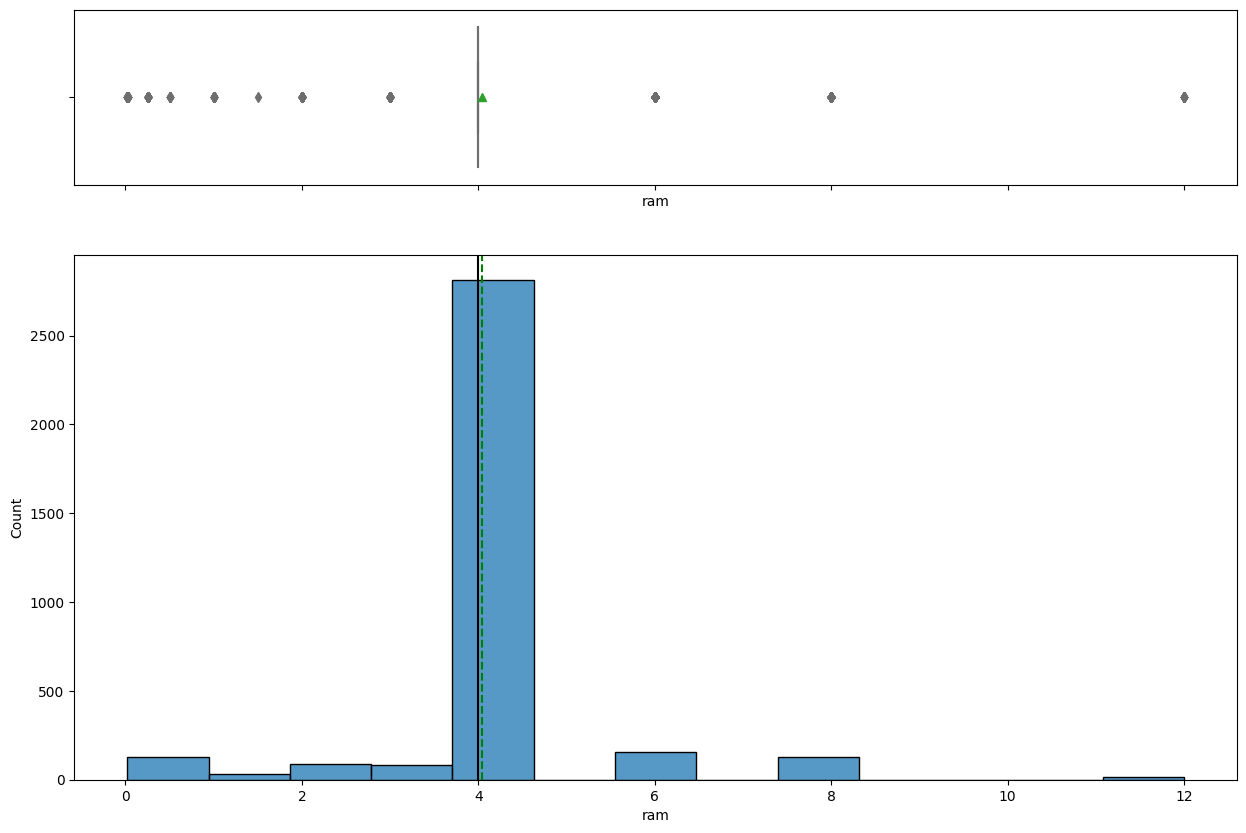

In [ ]:
histbox(df, 'ram')

- Average ram is 4gb.
- Almost all phones have the average ram. Because of that the other rams may seem like outliers, but they're normal and don't need treatment.

##### **battery**

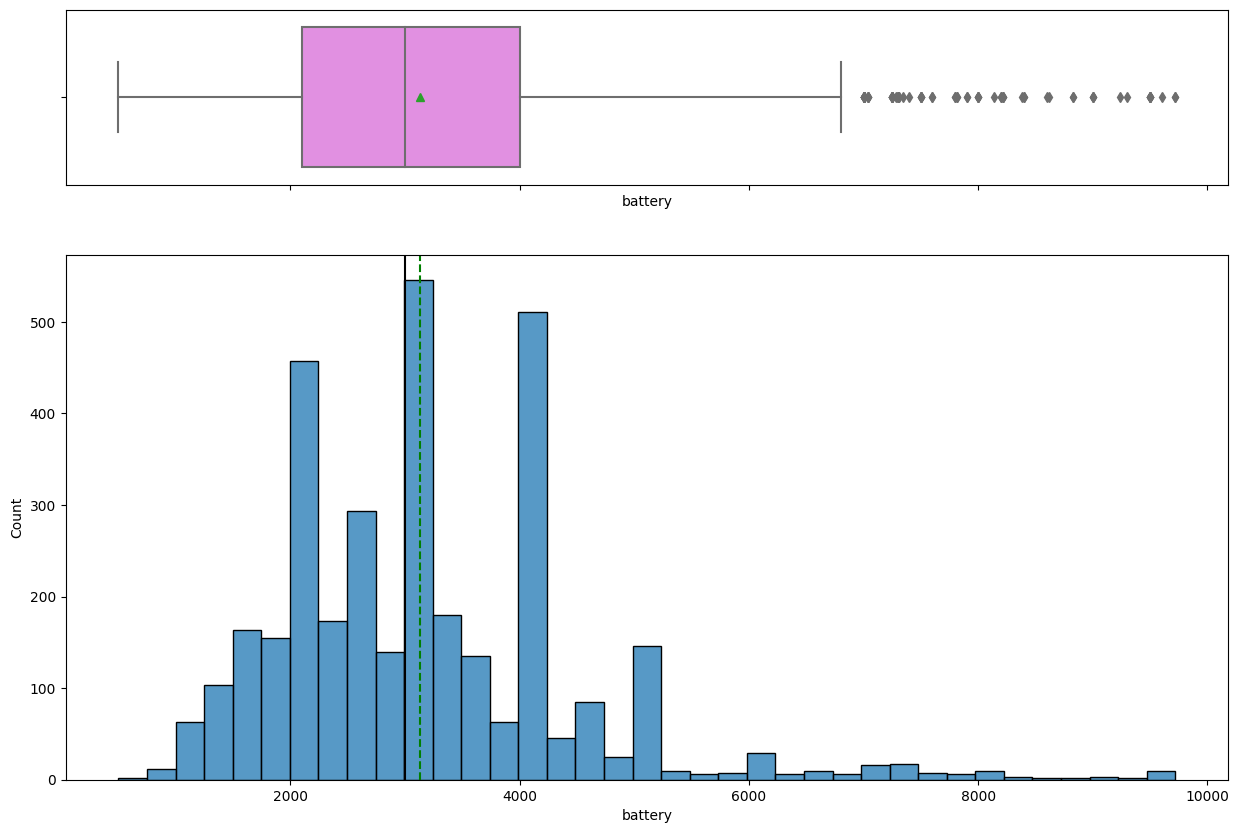

In [ ]:
histbox(df, 'battery')

- The distribution is right-skewed.
- Average battery is around 3.000 mAh.
- Very few phones have over 5.000 mAh.

##### **weight**

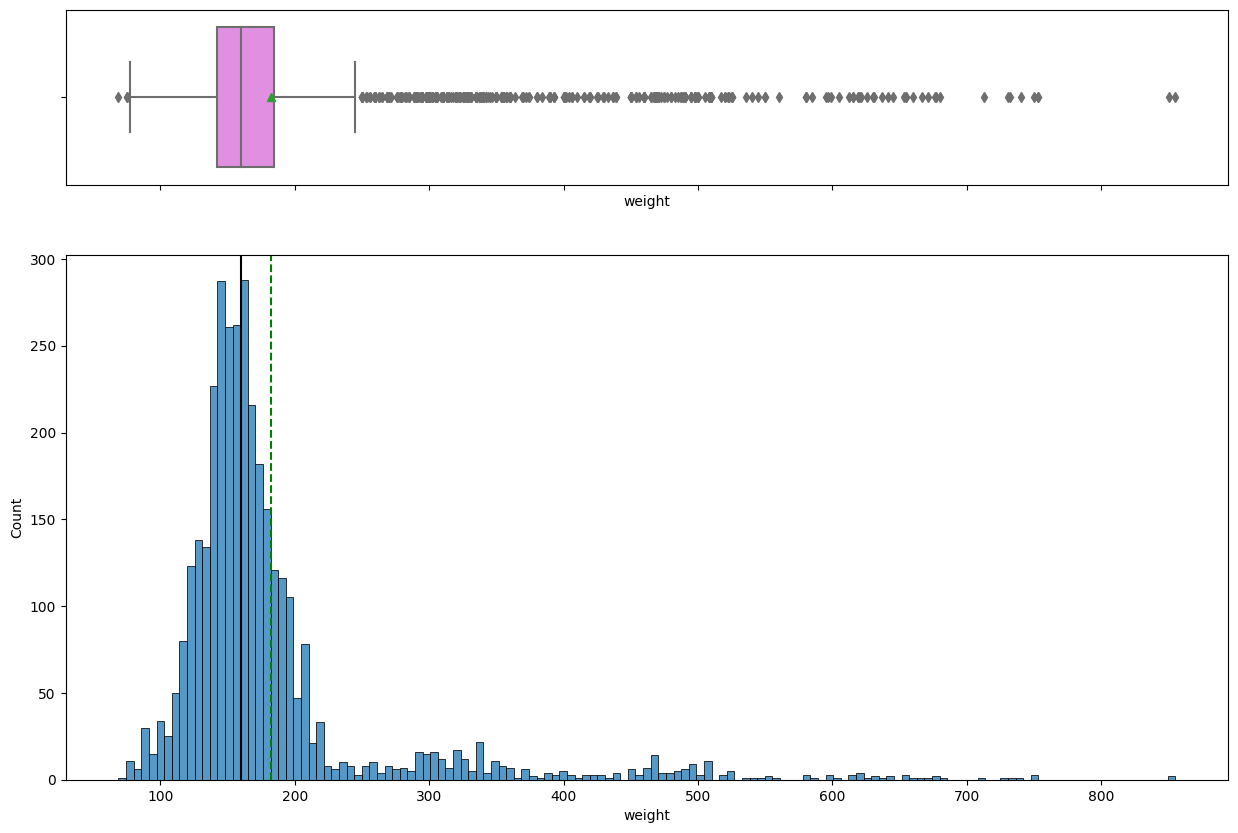

In [ ]:
histbox(df, 'weight')

- The distribution looks pretty normal between 50 and 250 grams.
- The average weight is around 160g.
- The heavier the phone the less frequent it is, which is expected. We could check those outliers and see if they're real.

In [ ]:
weight_700 = df[df['weight'] > 700]
weight_700

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
662,Apple,iOS,30.71,yes,no,8.0,1.2,32.0,4.0,3937.0,713.0,2015,572,5.558872,6.744671
1141,Others,Android,30.56,no,no,8.0,2.0,32.0,4.0,2500.0,850.0,2015,652,5.239310,6.194773
1142,Others,Android,25.43,no,no,5.0,2.0,16.0,4.0,8380.0,855.0,2015,889,5.163585,5.480264
2581,Samsung,Android,30.53,yes,no,8.0,2.0,32.0,4.0,9500.0,753.0,2014,1089,5.652524,6.506516
2582,Samsung,Android,30.53,no,no,8.0,2.0,32.0,4.0,9500.0,753.0,2014,1078,5.373842,6.463232
2583,Samsung,Android,30.53,no,no,8.0,2.0,32.0,4.0,9500.0,750.0,2014,689,5.274127,6.289307
2584,Samsung,Android,30.53,yes,no,8.0,2.0,32.0,4.0,9500.0,740.0,2014,921,5.336865,6.213708
2585,Samsung,Android,30.53,no,no,8.0,2.0,32.0,4.0,9500.0,732.0,2014,799,5.326856,6.150986
2586,Samsung,Android,30.53,no,no,8.0,2.0,32.0,4.0,9500.0,730.2,2014,1061,4.940499,6.042490


- On average, these heavy phones have a big screen, a high internal memory, and a big battery, therefore we can conclude that these values are real and don't need any treatment.

##### **release year**

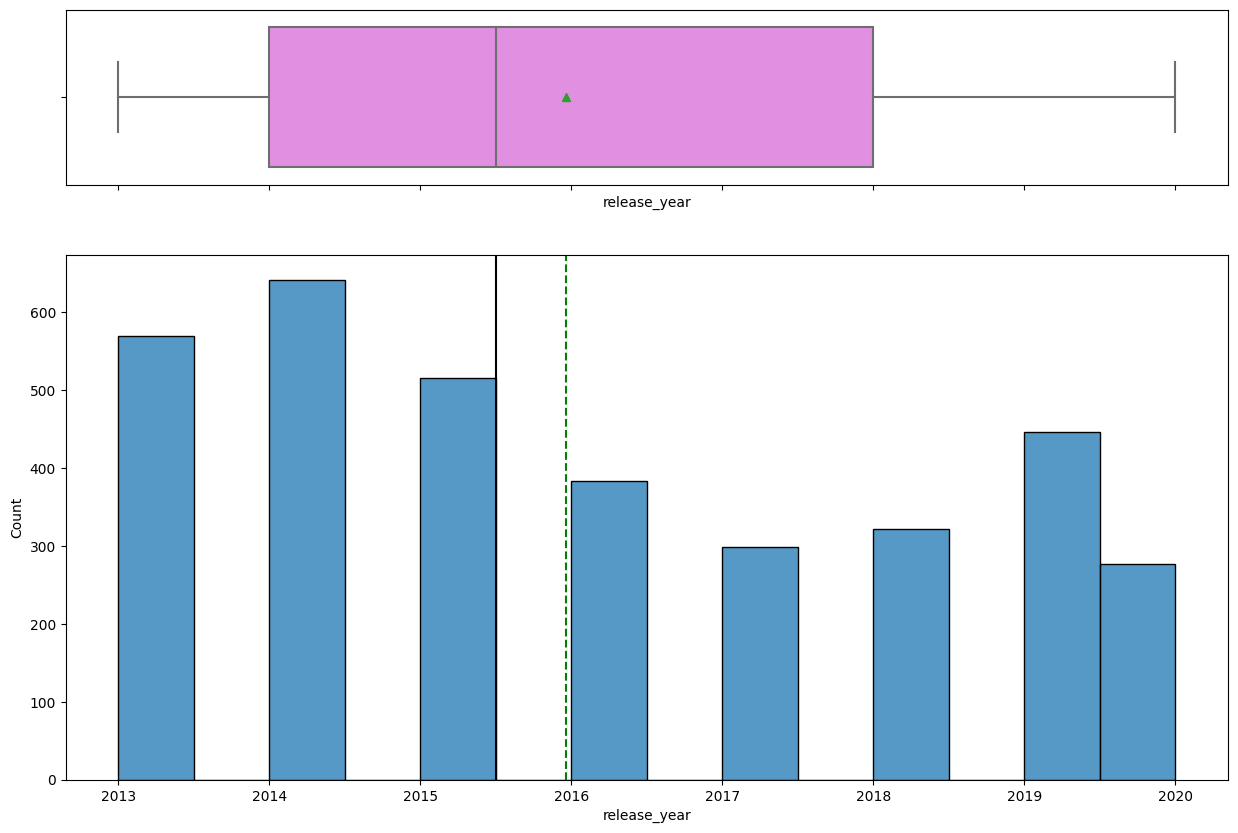

In [ ]:
histbox(df, 'release_year')

- Most phones were released between 2013 and 2016.

##### **days used**

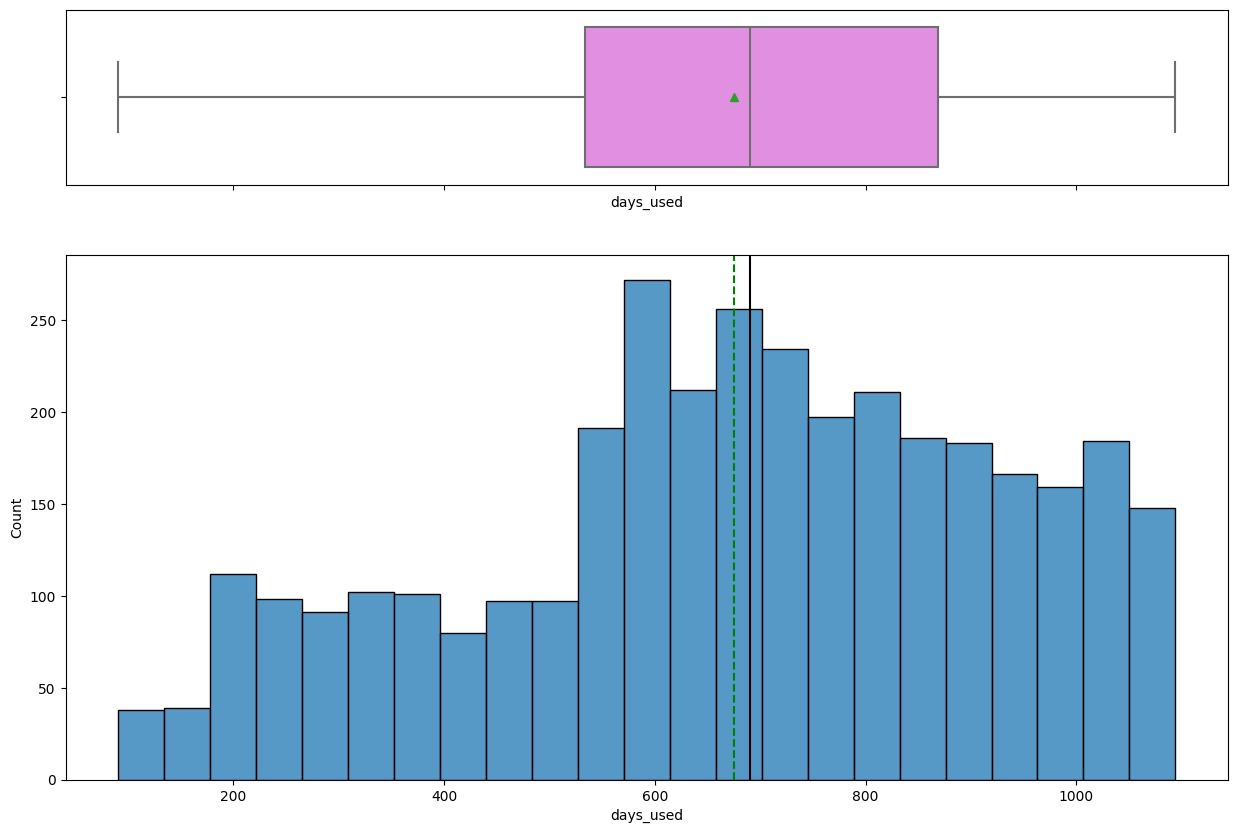

In [ ]:
histbox(df, 'days_used')

- Average days used is around 700 days, or almost 2 years.
- Most phones are used for more than 550 days.

#### Categorical

##### **brand name**

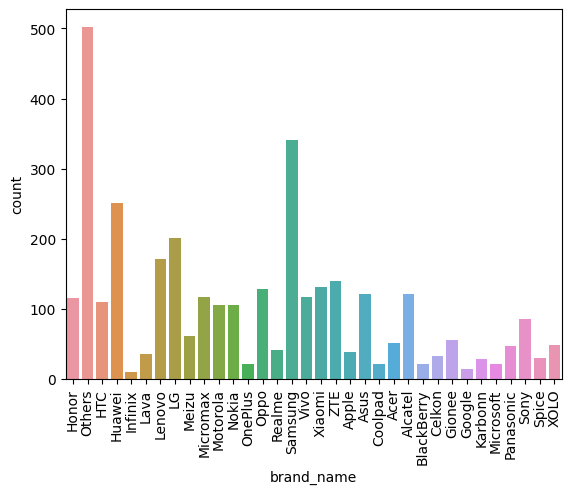

In [ ]:
sns.countplot(data=df, x=df['brand_name'])
plt.xticks(rotation=90)
plt.show()

- Others and Samsung have the most amount of devices. Followed by Huawei, LG, and Lenovo.

##### **os**

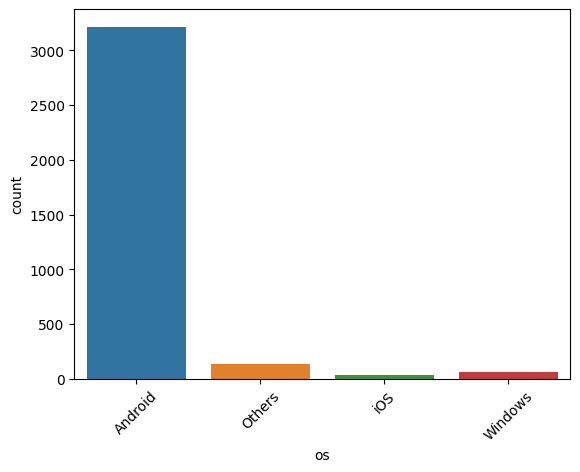

In [ ]:
sns.countplot(data=df, x=df['os'])
plt.xticks(rotation=45)
plt.show()

- Almost all devices have Android as the OS.

In [ ]:
df['os'].value_counts()

Android    3214
Others      137
Windows      67
iOS          36
Name: os, dtype: int64

In [ ]:
df.shape

(3454, 15)

In [ ]:
android_market = (3214 / 3454) *100
print('android devices occupy', round(android_market, 2),'% of the used device market')

android devices occupy 93.05 % of the used device market


##### **4g**

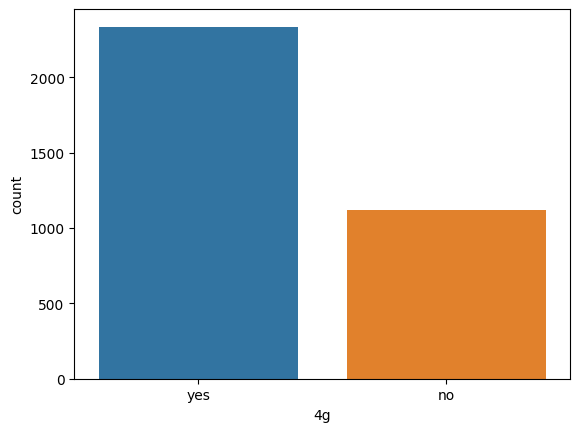

In [ ]:
sns.countplot(data=df, x=df['4g'])
plt.show()

- Most devices have 4g; over 2.000.
- A little bit over 1.000 devices don't have 4g.

##### **5g**

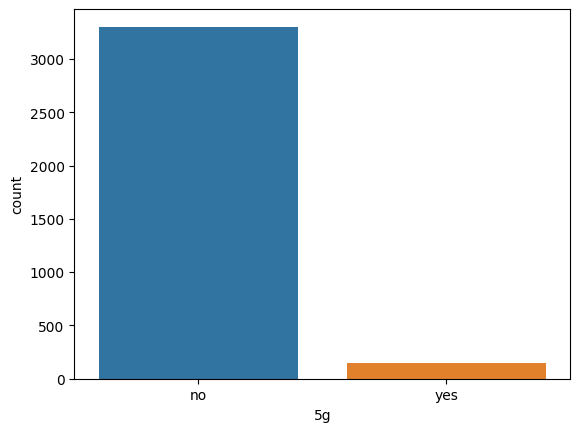

In [ ]:
sns.countplot(data=df, x=df['5g'])
plt.show()

- Almost all devices don't have 5g, just a handfull have it.

### Bivariate Analysis

#### General Analysis

First, let's check the correlation of numerical variables

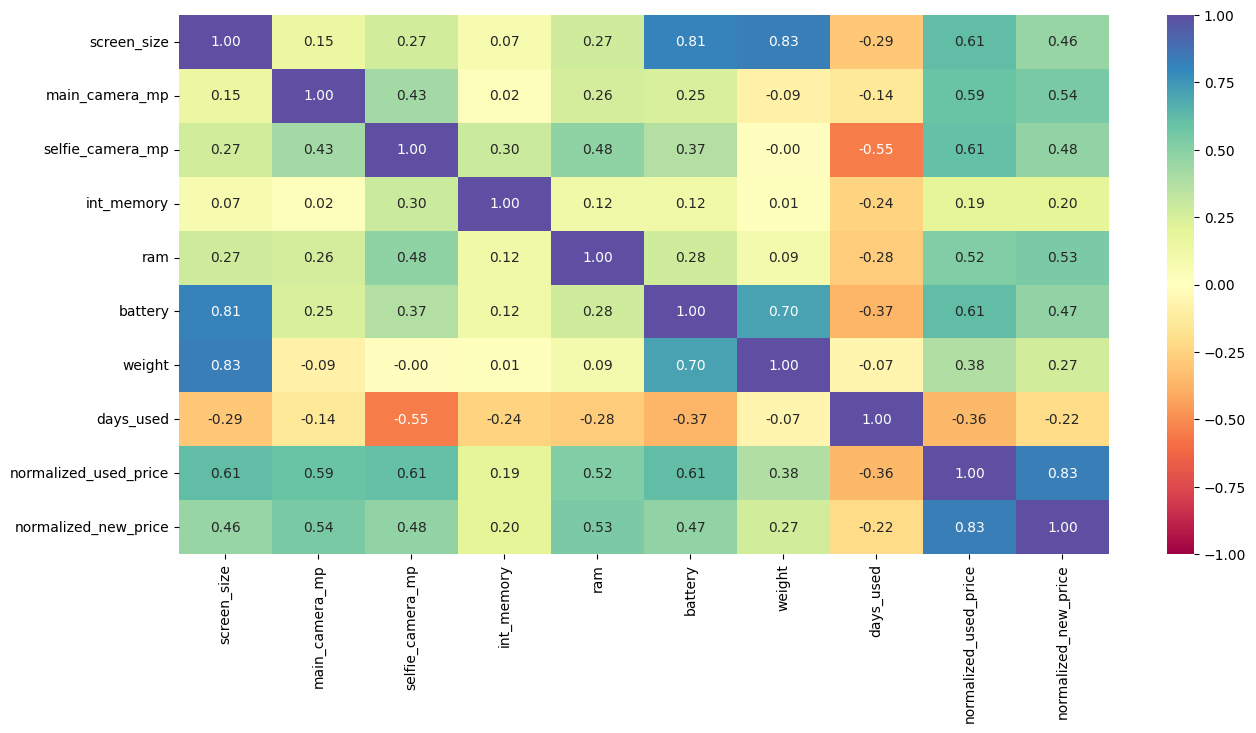

In [ ]:
# To create the heatmap, I'll create a list of only the numerical variables
corr_list = df.select_dtypes(include=np.number).columns.tolist()

# And let's drop release year since it's temporal
corr_list.remove("release_year")

# Now let's plot the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[corr_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Used price has a high correlation with normalized new price, screen size, selfie camera mp, battery, main camera mp, and ram (from higher to lower).
- Used price has low correlation with internal memory, weight, and days used.
- Battery, weight, and screen size have high correlation overall between them. This can result in multicollinearity issues.

Now let's create a plot to explore the relationship between variables

In [ ]:
# Fisr, let's create a dataframe with only the numerical variables
numerical = df.select_dtypes(include=np.number)
numerical

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...
3449,15.34,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,15.24,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,15.80,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,15.80,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


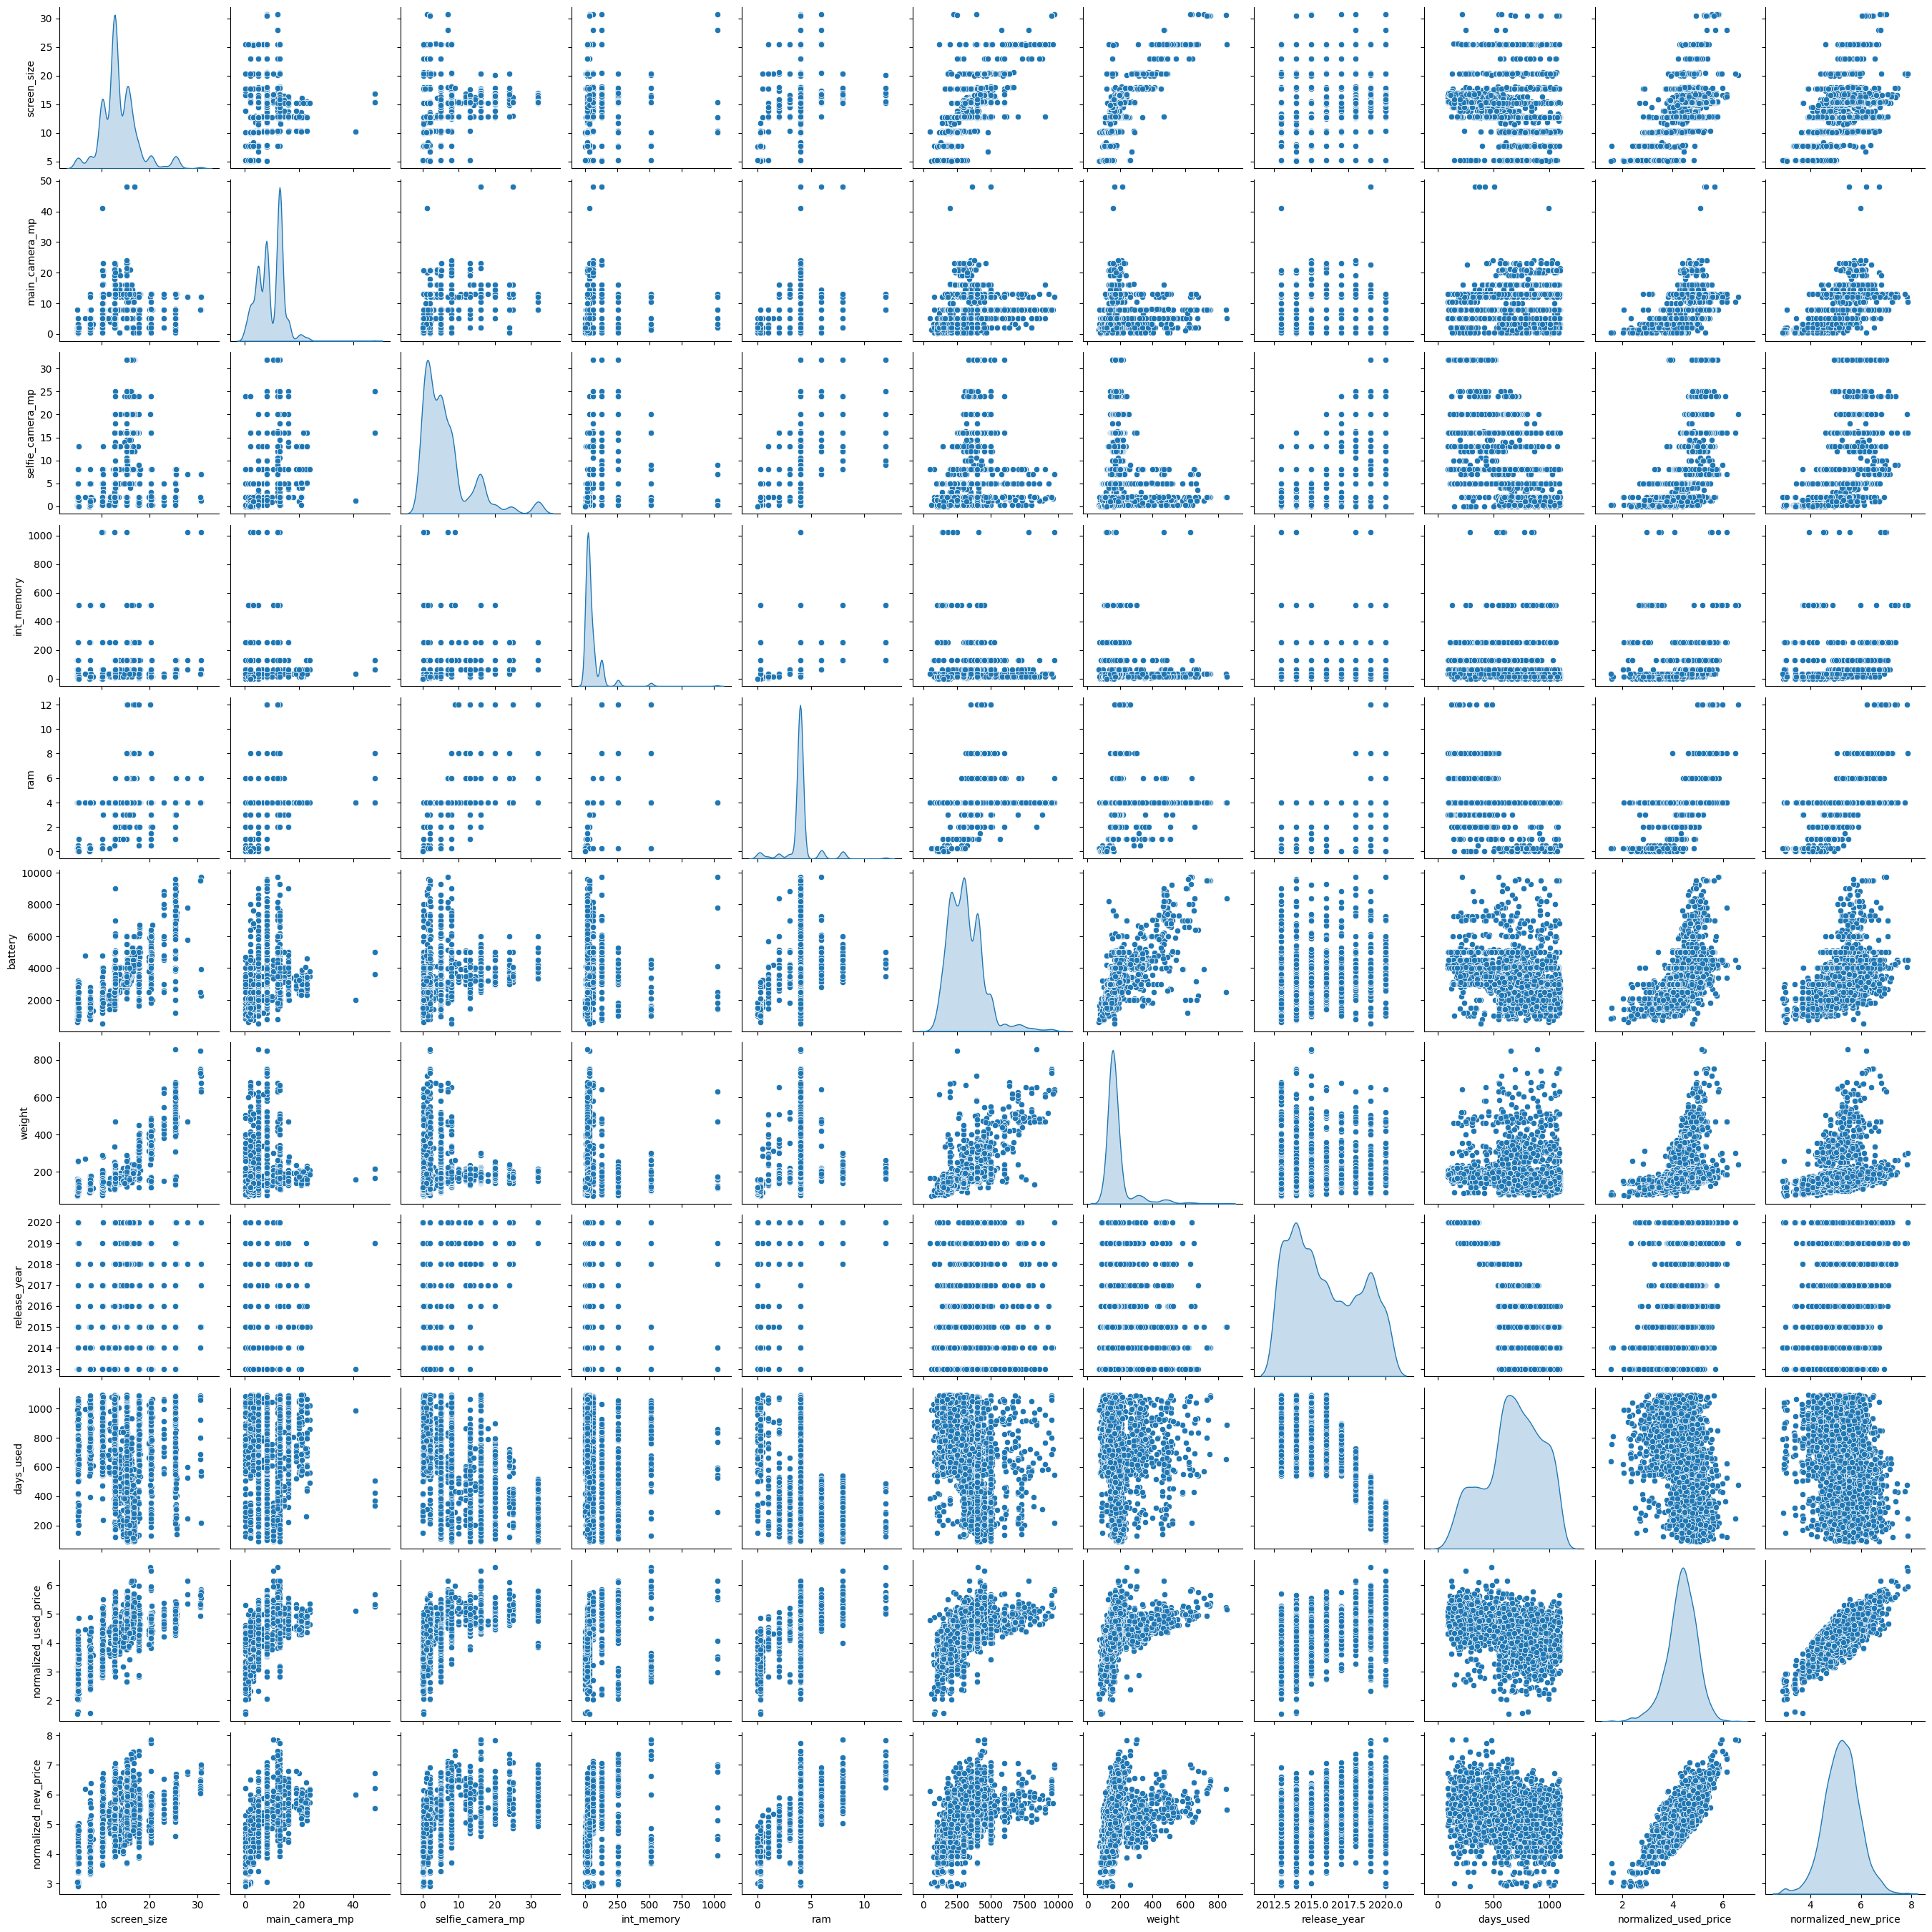

In [ ]:
# Now the pairplot with the KDE instead of the histogram
sns.pairplot(numerical, diag_kind="kde")

- Used and new price have a visible linear relationship.
- The relationship between used price vs weight and battery seem to be more like a curve, some linear relationship can be captured.
- The rest of the variables definitely don't have a linear relationship.
- Battery and weight seem to have a strong relationship, with some linearity.
- Some assumptions seem to be violated.

#### Specific

##### **A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?**

In [ ]:
battery_4500 = df[df['battery'] > 4500]
battery_4500

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
11,Honor,Android,15.32,yes,no,13.0,8.0,64.0,4.0,5000.0,185.0,2020,344,4.657383,4.770176
19,Honor,Android,25.43,yes,no,5.0,2.0,32.0,3.0,5100.0,173.0,2019,266,4.267878,5.517051
20,Honor,Android,20.32,yes,no,8.0,8.0,32.0,3.0,5100.0,173.0,2019,321,4.556295,5.304001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3420,Samsung,Android,15.47,yes,yes,8.0,13.0,128.0,12.0,5000.0,222.0,2020,197,5.623042,6.792120
3421,Samsung,Android,15.47,yes,no,8.0,13.0,128.0,12.0,5000.0,220.0,2020,176,5.594265,6.960775
3434,Samsung,Android,15.34,yes,no,12.0,16.0,64.0,4.0,6000.0,188.0,2019,455,4.781641,5.109937
3448,Asus,Android,16.74,yes,no,NaN,24.0,128.0,8.0,6000.0,240.0,2019,325,5.715316,7.059317


- There are 341 phones with a battery > 4.500 mAh.

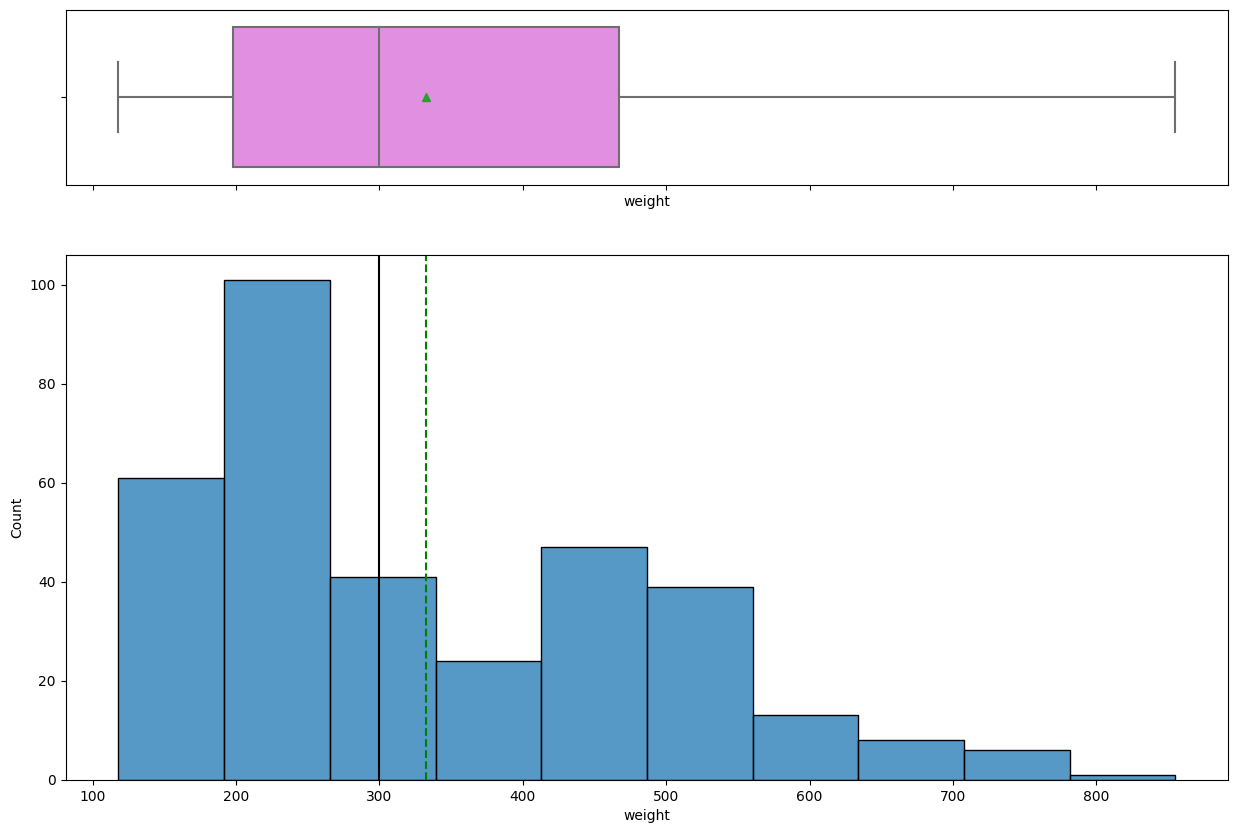

In [ ]:
histbox(battery_4500, 'weight')

-  Phones with a battery > 4.500 mAh have a average weight of 300g, compared to all the phones that have an average weight of 160g.
- Most of those phones are between 200g and 500g.
- They're in fact heavier, around 2x heavier than the rest. However, I don't consider it to be a huge weight, they're still manageable.

##### **The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?**

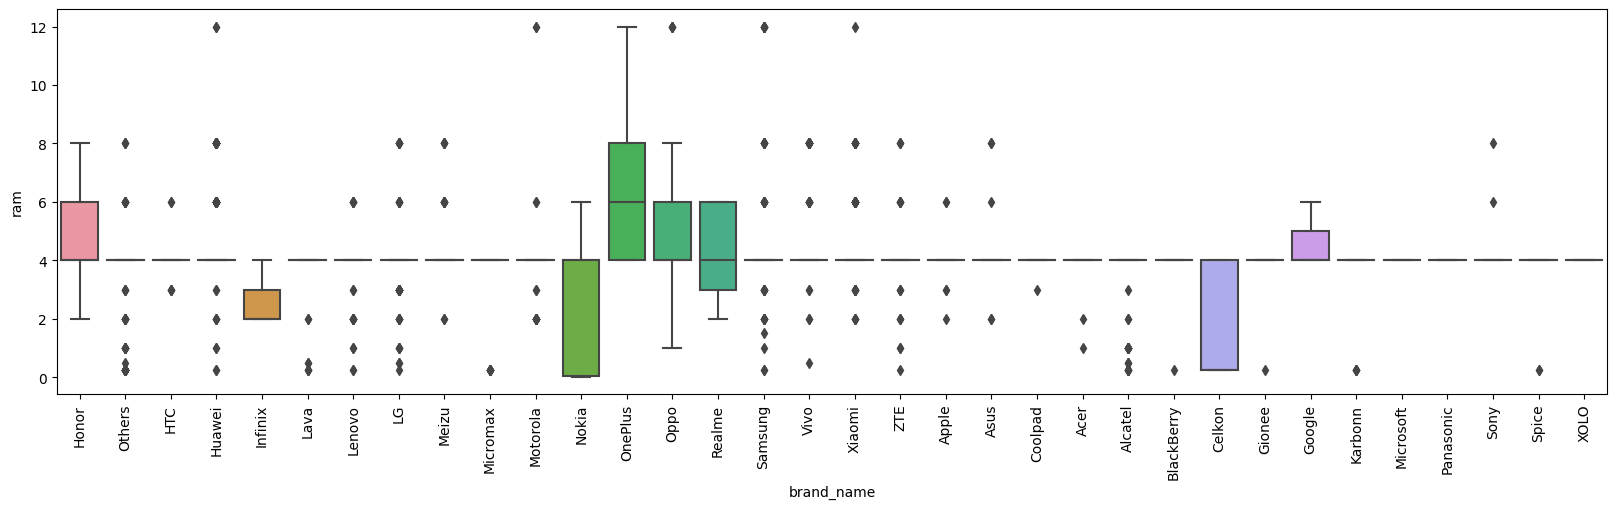

In [ ]:
# Let's create a boxplot for both ram and brand
plt.figure(figsize=(20, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

- Most brands have a standard ram of 4gb
- OnePlus has the devices with the highest ram, with 50% of them being between 4gb and 8gb, and some devices even with 12gb. Other brands only have outliers with 12gb of ram.
- Besides OnePlus, the brands Honor and Oppo are the other ones that manufacture devices of 6+ram consistently.
- Brands like Microsoft, Panasonic, and XOLO only produced devices of 4gb of ram.

##### **Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?**


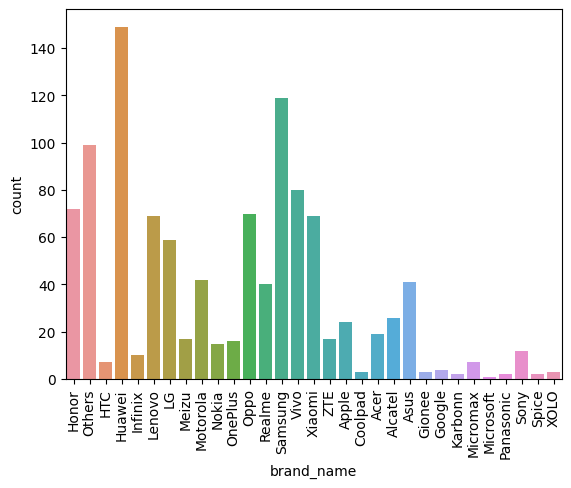

In [ ]:
screen_6inch = df[df['screen_size'] > (6 * 2.54)]
sns.countplot(data=screen_6inch, x='brand_name')
plt.xticks(rotation=90)
plt.show()

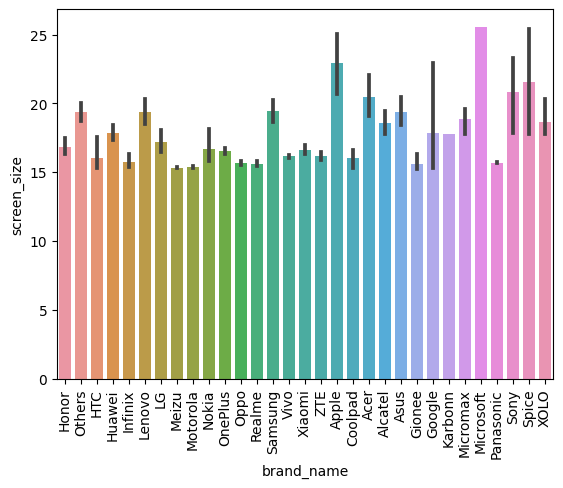

In [ ]:
sns.barplot(data=screen_6inch, x='brand_name', y='screen_size')
plt.xticks(rotation=90)
plt.show()

In [ ]:
screen_6inch.shape

(1099, 15)

- There are 1099 devices with screens bigger than 6 inches.
- Huawei and Samsung have the most devices with big screens. They're the best option in terms of visual entertainment, excluding performance.
- Microsoft and Apple have the devices with the highest average screen size. Followed by Spice, Sony, and Acer.

##### **A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?**

In [ ]:
selfie_8mp = df[df['selfie_camera_mp'] > 8]

In [ ]:
selfie_8mp.shape

(655, 15)

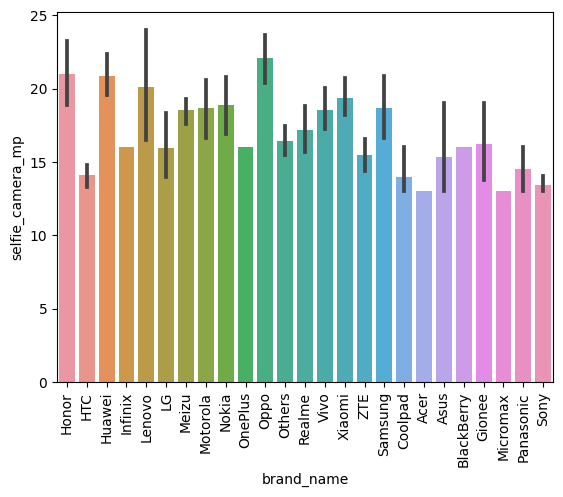

In [ ]:
sns.barplot(data=selfie_8mp, x='brand_name', y='selfie_camera_mp')
plt.xticks(rotation=90)
plt.show()

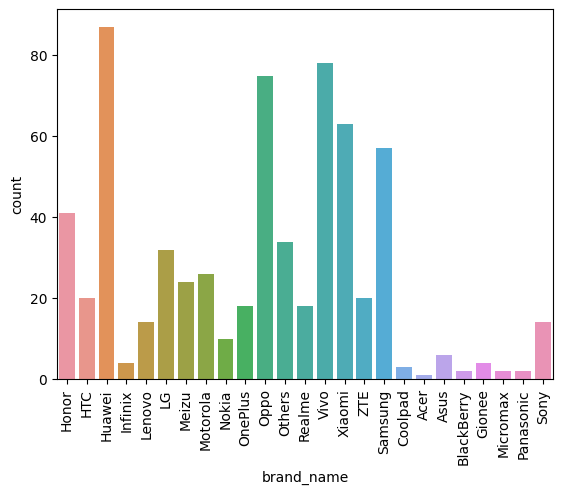

In [ ]:
sns.countplot(data=selfie_8mp, x='brand_name')
plt.xticks(rotation=90)
plt.show()

- There are 655 devices with a selfie camepra mp higer than 8.
- Out of those >8mp devices, Oppo, Honor, Huawei, and Lenovo have the highest average selfie camera mp with over 20mp.
- HTC, Acer, Micromax, Sony, and Coolpad have the lowest average, just below 15mp.
- Huawei, Oppo, and Vivo have the most devices with >8mp selfie cameras.

##### **Now let's see how used price changes by brand name**

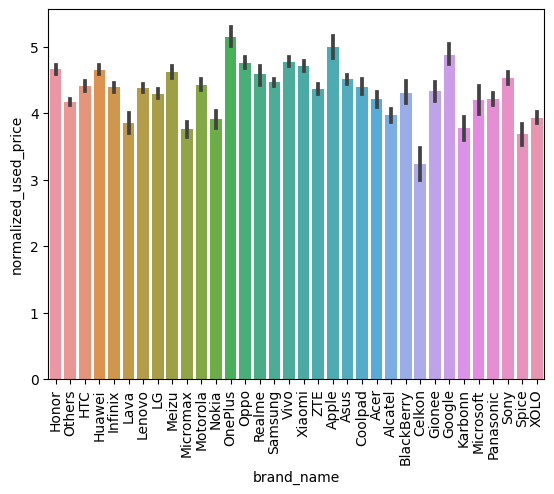

In [ ]:
sns.barplot(data=df, x='brand_name', y='normalized_used_price')
plt.xticks(rotation=90)
plt.show()

- OnePlus, Apple, and Google have the highest average used price.
- On the other side, Celkon, Lava, Micromax, Karboon, and Spice have the lowest average used price.

##### **How used price changes if device has 4g or not**

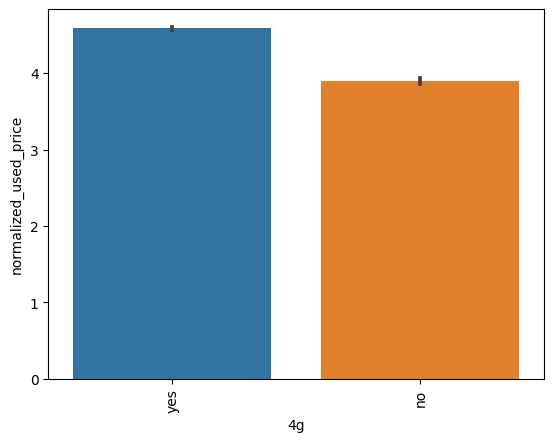

In [ ]:
sns.barplot(data=df, x='4g', y='normalized_used_price')
plt.xticks(rotation=90)
plt.show()

- Devices with 4g have a higher average price, but the difference is not that big

##### **How used price changes if device has 5g or not**

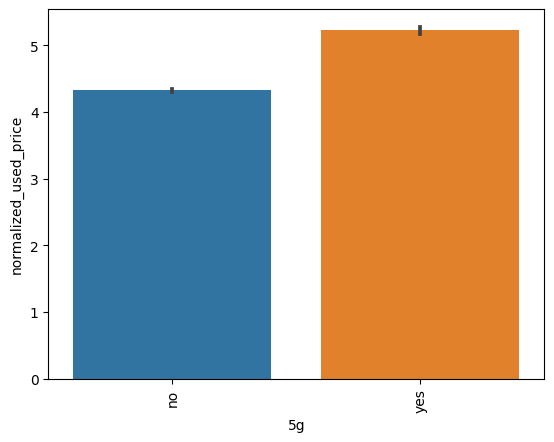

In [ ]:
sns.barplot(data=df, x='5g', y='normalized_used_price')
plt.xticks(rotation=90)
plt.show()

- Devices with 5g have higher average used price than devices without 5g, again, the difference is not that big.

##### **How used price changes by OS**

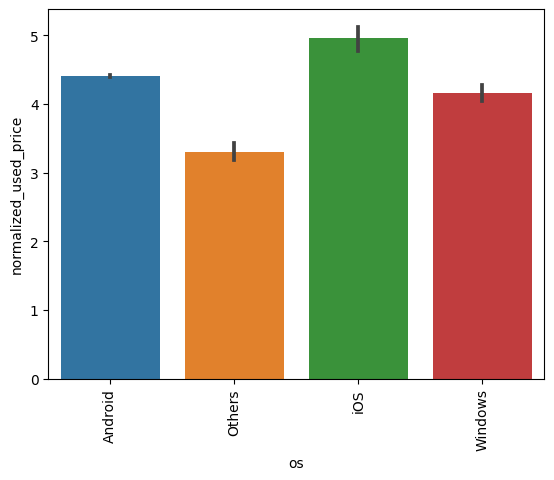

In [ ]:
sns.barplot(data=df, x='os', y='normalized_used_price')
plt.xticks(rotation=90)
plt.show()

- As expected, iOS devices have the highest average used price. Followed by Android, Windows, and Others.

##### **How weight changes by brand**

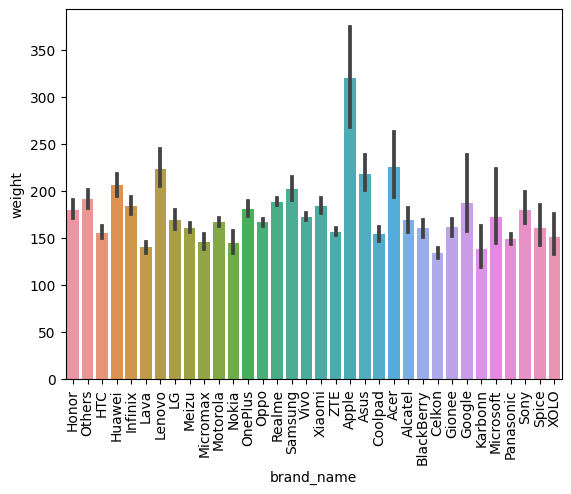

In [ ]:
sns.barplot(data=df, x='brand_name', y='weight')
plt.xticks(rotation=90)
plt.show()

- Apple has the highest average weight across all brands.
- Most brands have an average weight in the range of 130g and 200g.

##### **How battery changes by brand**

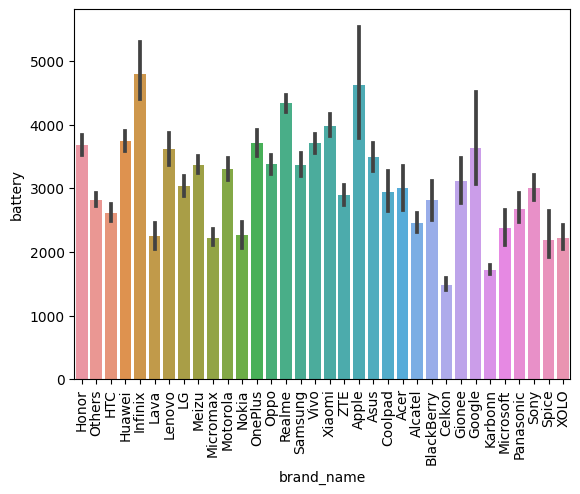

In [ ]:
sns.barplot(data=df, x='brand_name', y='battery')
plt.xticks(rotation=90)
plt.show()

- Infinix, Apple, and Realme have the highest average battery size.
- Celkon and Karbonn have the lowest average battery size.

##### **How main camera mp changes by brand**

/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


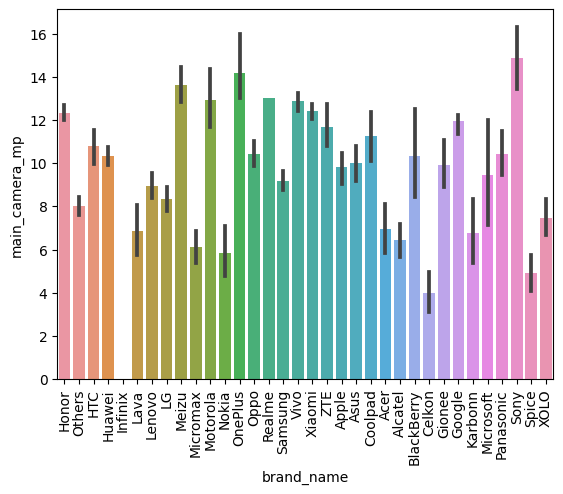

In [ ]:
sns.barplot(data=df, x='brand_name', y='main_camera_mp')
plt.xticks(rotation=90)
plt.show()

- The variance of average main camera mp is very high, ranging between 4mp and 14mp across all brands.
- Sony, OnePlus, and Meizu have the highest average main camera mp.

##### **How used price changes by year of release**

<Axes: xlabel='release_year', ylabel='normalized_used_price'>

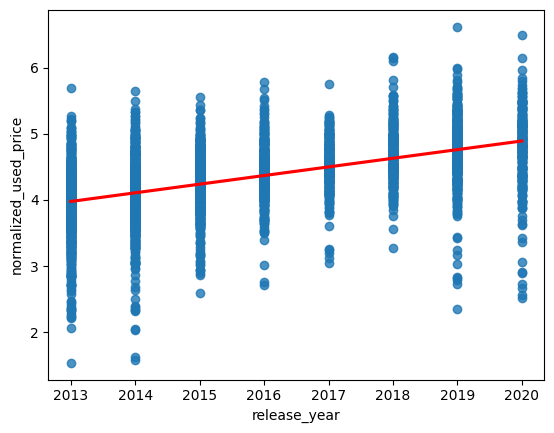

In [ ]:
sns.regplot(x='release_year', y='normalized_used_price', data=df, ci=None, line_kws={'color': 'red'})


- Overall, the average used price tends to increase as the year the device was released increases; on average newer devices have higher used prices.

## Data Preprocessing

### Missing Value Treatment

Before treating the missing values, I'll create a copy of the data frame.

In [ ]:
df1 = df.copy()

In [ ]:
# Let's check the null values
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

All the variables with missing values are numerical:

main_camera_mp           179,
selfie_camera_mp           2,
int_memory                 4,
ram                        4,
battery                    6,
weight                     7

<Axes: xlabel='main_camera_mp'>

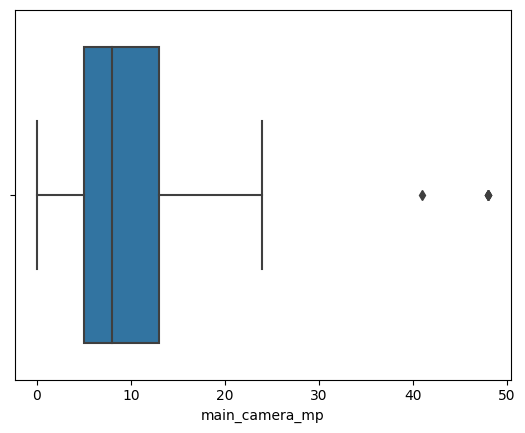

In [ ]:
# Let's plot main_camera_mp that has the highest number of missing values
sns.boxplot(data=df, x='main_camera_mp')

<Axes: xlabel='main_camera_mp', ylabel='Count'>

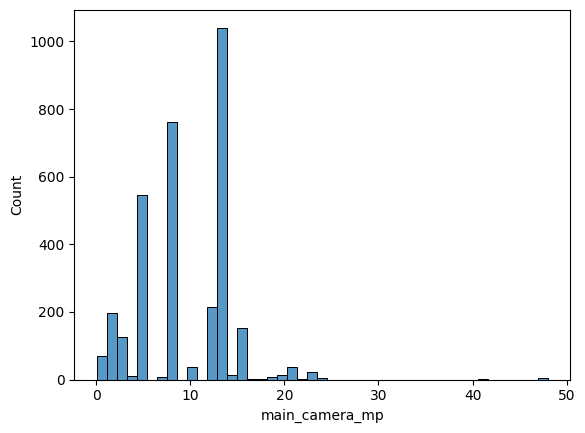

In [ ]:
sns.histplot(data=df, x='main_camera_mp')

We could treat the missing values replacing by the mean or the median, but since the distribution has some clear tendencies like 5, 8, and 13 megapixels, the median would be better. We'll do the same with the other variables.

In [ ]:
# Let's check if the missing values have the correct value as NaN
is_nan = df1[df1['main_camera_mp'].isna()]
is_nan

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
59,Infinix,Android,17.32,yes,no,NaN,8.0,32.0,2.0,6000.0,209.0,2020,245,4.282068,4.597642
60,Infinix,Android,15.39,yes,no,NaN,8.0,64.0,4.0,5000.0,185.0,2020,173,4.363608,4.711780
61,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.0,5000.0,185.0,2020,256,4.181439,4.505460
62,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.0,2019,316,4.555244,4.602166
63,Infinix,Android,15.29,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,468,4.416670,4.871297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411,Realme,Android,15.34,yes,no,NaN,16.0,64.0,4.0,4000.0,183.0,2019,503,4.570475,5.159974
3412,Realme,Android,15.32,yes,no,NaN,16.0,64.0,4.0,4035.0,184.0,2019,433,4.521027,5.074424
3413,Realme,Android,15.32,yes,no,NaN,25.0,64.0,4.0,4045.0,172.0,2019,288,4.778199,4.966753
3448,Asus,Android,16.74,yes,no,NaN,24.0,128.0,8.0,6000.0,240.0,2019,325,5.715316,7.059317


There are 179 rows with NAN, that corresponds to the amount of missing values. Let's proceed.

(We could've also inferred that the missing values were flagged correctly as NaN since the data type was correct, but I wanted to make sure).

In [ ]:
# I would like to apply the fillna function to the entire DataFrame, but since I have object type variables it didn't work
# So I'll manually replace the NaN values in each column

# First, let's see the medians
df1.median()

<ipython-input-167-3e348fc80948>:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.median()


screen_size                12.830000
main_camera_mp              8.000000
selfie_camera_mp            5.000000
int_memory                 32.000000
ram                         4.000000
battery                  3000.000000
weight                    160.000000
release_year             2015.500000
days_used                 690.500000
normalized_used_price       4.405133
normalized_new_price        5.245892
dtype: float64

In [ ]:
# Keep in mind the variables with missing values are main_camera_mp, selfie_camera_mp, int_memory, ram, battery, and weight
# Now I'll use the fillna function to replace NaN values with the median

df1['main_camera_mp'].fillna(df1['main_camera_mp'].median(), inplace = True)

In [ ]:
# Let's check if it worked correctly
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         2
int_memory               4
ram                      4
battery                  6
weight                   7
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

It worked correctly. Now let's do it with the rest.

In [ ]:
df1['selfie_camera_mp'].fillna(df1['selfie_camera_mp'].median(), inplace = True)
df1['int_memory'].fillna(df1['int_memory'].median(), inplace = True)
df1['ram'].fillna(df1['ram'].median(), inplace = True)
df1['battery'].fillna(df1['battery'].median(), inplace = True)
df1['weight'].fillna(df1['weight'].median(), inplace = True)

In [ ]:
# Let's check again
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

All NaN values have been replaced with their respective median.

### Feature Engineering

In [ ]:
# Let's create a new column based on the release year
# This column will have the years since release date
# We'll use the latest year the data has (2021) as the base

df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)

# Done!

In [ ]:
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_since_release
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1


### Outliers

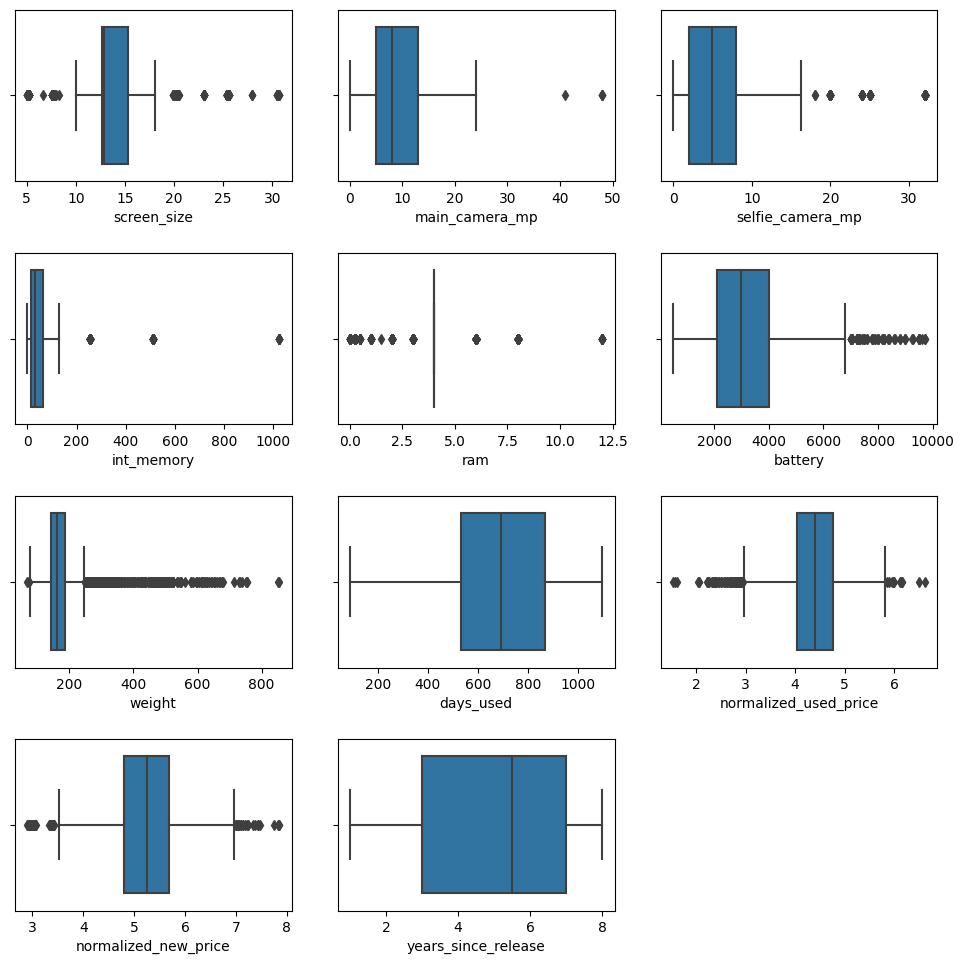

In [ ]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(10, 10))
for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

- The most problematic outliers are from weight, battery, and screen size. However, we already evaluated those on the initial EDA.
- This variables are highly correlated and can have some very big values (most of those outliers are higher than average).
- We evaluated them in the EDA and concluded that the values were real. For that reason, we won't treat them.

### Data Preparation (X, Y, and Dummies)

- We want to predict the used price of phones/tablets
- We'll split the data into training and testing sets

In [ ]:
# Let's create the independent and dependent variables

X = df1.drop(['normalized_used_price'], axis=1)
y = df1['normalized_used_price']

In [ ]:
X.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,years_since_release
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,1


In [ ]:
y.head()

0    4.307572
1    5.162097
2    5.111084
3    5.135387
4    4.389995
Name: normalized_used_price, dtype: float64

In [ ]:
# let's add a intercept to the independent variables
X = sm.add_constant(X)

In [ ]:
# Let's create the dummies

X = pd.get_dummies(X, columns= X.select_dtypes(include = ['object', 'category']).columns.tolist(), drop_first= True)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
X.count()

const                    3454
screen_size              3454
main_camera_mp           3454
selfie_camera_mp         3454
int_memory               3454
ram                      3454
battery                  3454
weight                   3454
days_used                3454
normalized_new_price     3454
years_since_release      3454
brand_name_Alcatel       3454
brand_name_Apple         3454
brand_name_Asus          3454
brand_name_BlackBerry    3454
brand_name_Celkon        3454
brand_name_Coolpad       3454
brand_name_Gionee        3454
brand_name_Google        3454
brand_name_HTC           3454
brand_name_Honor         3454
brand_name_Huawei        3454
brand_name_Infinix       3454
brand_name_Karbonn       3454
brand_name_LG            3454
brand_name_Lava          3454
brand_name_Lenovo        3454
brand_name_Meizu         3454
brand_name_Micromax      3454
brand_name_Microsoft     3454
brand_name_Motorola      3454
brand_name_Nokia         3454
brand_name_OnePlus       3454
brand_name

The dummies dropped were:
- brand_name_Acer
- os_android
- 4g_no
- 5g_no

In [ ]:
# Now let's split the data 70% for training and 30% for testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Let's make sure it's correct

In [ ]:
x_train.shape

(2417, 49)

In [ ]:
x_test.shape

(1037, 49)

In [ ]:
x_train_percent = round((2417/3454)*100, 2)
x_train_percent

69.98

In [ ]:
x_test_percent = round((1037/3454)*100, 2)
x_test_percent

30.02

The percentages fit accordingly. Let's proceed.

## Model Building - Linear Regression

In [ ]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.8
Date:                   Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                           03:00:21   Log-Likelihood:                 124.22
No. Observations:                   2417   AIC:                            -150.4
Df Residuals:                       2368   BIC:                             133.3
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


- The model has a very good R-sq of 0.845. When we start dropping variables we'll evaluate the adj-Rsq.
- The intercept when all coefficients of independent variables are 0 is 1.3286.
- Most dummies have a very high p-value and probably will be dropped.
- Without checking for multicollinearity, we see most numerical variables are bringing valuable information to the model. int memory and days used would be the exception.
- We could do a simple interpretation of coefficients, standard error, and confidence intervals, but we're not sure about multicollinearity issues and other assumptions, so let's do it after we check and fix those.

## Model Performance Check

### General Performance

Let's check performance by analyzing the prediction abilities of the model. For that, we'll use RMSE, MAPE, MAE, and Rsq.

In [ ]:
# Let's use the functions from the learning sessions to compute everything much faster

# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# Let's check the performance on the training set
olsmodel_train_p = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_p

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229849,0.180336,0.844933,0.841723,4.326958


In [ ]:
olsmodel_test_p = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_p

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238306,0.184064,0.842547,0.834731,4.488006


- The Rsq remained pretty much the same, therefore there's no underfitting. We captured enough information.
- There's a small increase on the test RMSE and MAE, but it's very small. Therefore there's no overfitting.
- MAE means that on the test data, the model is able to predict the used price with a mean error of 0.18, pretty much the same as the MAE in training data.
- With a MAPE of 4.49 in the test data, we were able to predict within 4.49% of the used prices.

Very good results overall.

## Checking Linear Regression Assumptions

Let's go one-by-one checking the assumptions:

- No Multicollinearity (and high p-value variables)

- Linearity of variables

- Independence of error terms

- Normality of error terms

- No Heteroscedasticity

### Multicollinearity

Again, I'll use a function from the learning sessions

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(x_train)[:12]

,feature,VIF
0,const,228.603553
1,screen_size,7.680705
2,main_camera_mp,2.136597
3,selfie_camera_mp,2.808416
4,int_memory,1.361465
5,ram,2.258272
6,battery,4.073582
7,weight,6.380746
8,days_used,2.669393
9,normalized_new_price,3.121941


- Screen size and weight are the only ones with high VIF.
- Baterry, and years since release are close to 5, but we could keep them.

First, let's check the effect on dropping each high VIF variable

In [ ]:
print(olsmodel.rsquared)
print(olsmodel.rsquared_adj)

0.8449333686368375
0.8417901261092059


Dropping screen size



In [ ]:
x_train2 = x_train.drop(['screen_size'], axis=1)
# New model
olsmodel_2 = sm.OLS(y_train, x_train2).fit()
print(olsmodel_2.rsquared)
print(olsmodel_2.rsquared_adj)

0.8415903563656877
0.8384475732290002


- Very small decrease of adj Rsq from 0.842 - 0.838

Dropping weight

In [ ]:
x_train3 = x_train.drop(['weight'], axis=1)
# New model
olsmodel_3 = sm.OLS(y_train, x_train3).fit()
print(olsmodel_3.rsquared)
print(olsmodel_3.rsquared_adj)

0.8413274478255341
0.8381794486899495


- Pretty much the same change across both variables

After dropping screen size, the adj Rsq decreases the least, so we'll drop that one.

**Let's run the new model without screen size**

In [ ]:
# New training and test set
x_train_f = x_train.drop(['screen_size'], axis=1)
x_test_f = x_test.drop(['screen_size'], axis=1)

In [ ]:
olsmodel_f = sm.OLS(y_train, x_train_f).fit()

print(olsmodel_f.rsquared)
print(olsmodel_f.rsquared_adj)

0.8415903563656877
0.8384475732290002


The Adj Rsq decreased a bit, but nothing significant.

Let's check VIF:

In [ ]:
checking_vif(x_train_f)[:12]

,feature,VIF
0,const,203.584858
1,main_camera_mp,2.133663
2,selfie_camera_mp,2.804937
3,int_memory,1.359361
4,ram,2.258270
5,battery,3.835470
6,weight,2.980013
7,days_used,2.657368
8,normalized_new_price,3.079715
9,years_since_release,4.717189


- Multicollinearity issues are resolved!
- Now weight has a low VIF

In [ ]:
# Let's make a small test to check if dropping years since release makes sense

In [ ]:
x_train4 = x_train_f.drop(['years_since_release'], axis=1)

olsmodel_4 = sm.OLS(y_train, x_train4).fit()
print(olsmodel_4.rsquared)
print(olsmodel_4.rsquared_adj)

0.8384882794105563
0.8353534527662042


- There's a small decrease from 0.838 to 0.835, so we could technically drop it. But since the VIF is < 5, we'll keep it.

Let's see the latest model:

In [ ]:
print(olsmodel_f.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.8
Date:                   Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                           03:01:28   Log-Likelihood:                 98.446
No. Observations:                   2417   AIC:                            -100.9
Df Residuals:                       2369   BIC:                             177.0
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


- The adj Rsq decreased from to 0.838, therefore screen size was not bringing any new information to the model.

### High p-value variables

- Now that there's no multicollinearity, let's drop the variables that are not relevant.
- Battery, int memory, days used, and many dummies have p-values >0.05, therefore we'll use a loop to drop them one by one.

In [ ]:
# Here's the loop from the learning session

# initial list of columns
predictors = x_train_f.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_since_release', 'brand_name_LG', 'brand_name_Micromax', 'brand_name_Others', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes']


In [ ]:
# Now let's leave the training and test sets with only the significant variables

x_train_f1 = x_train_f[selected_features]
x_test_f1 = x_test_f[selected_features]

Let's run the new model

In [ ]:
olsmodel_f1 = sm.OLS(y_train, x_train_f1).fit()
print(olsmodel_f1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     837.2
Date:                   Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                           03:01:29   Log-Likelihood:                 82.585
No. Observations:                   2417   AIC:                            -133.2
Df Residuals:                       2401   BIC:                            -40.53
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

Now let's compare performance

In [ ]:
# Training performance
olsmodel_f1_train_p = model_performance_regression(olsmodel_f1, x_train_f1, y_train)
olsmodel_f1_train_p

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.233843,0.182808,0.839498,0.838428,4.392176


In [ ]:
# Test performance
olsmodel_f1_test_p = model_performance_regression(olsmodel_f1, x_test_f1, y_test)
olsmodel_f1_test_p

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241224,0.185969,0.838669,0.836138,4.541137


Observations:
- There are no variables with p-value > 0.05, all of them are significant.
- Based on the adj Rsq, the model is able to explain 83.9% of the variance.
- Adj Rsq decreases by a very small margin, so no underfitting problems.
- RMSE and MAE are very similar in train vs test, so no overfitting problems.

**olsmodel_f1 will be our final model. Now let's test the rest of the assumptions.**

### Linearity and Independence Assumption

In [ ]:
# let´s create a dataframe with the actual values, fitted values, and residuals

df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel_f1.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel_f1.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.886296,0.201192
1525,4.448399,4.612963,-0.164564
1128,4.315353,4.302529,0.012824
3003,4.282068,4.265073,0.016995
2907,4.456438,4.464609,-0.008171


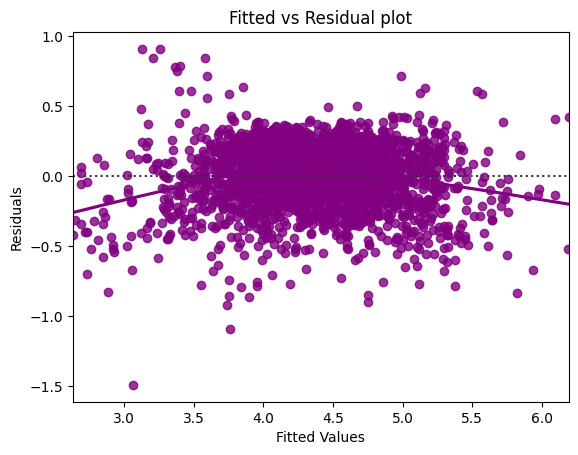

In [ ]:
# Now let's plot the fitted values and residuals. There should not be any pattern.

sns.residplot(data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

- We don't see any relevant pattern in the scatter plot, maybe a small tendency to agglomerate in the center, but nothing too significant. Therefore the assumptions of linearity and independence are satisfied.

### Normality Assumption

For this assumption, we'll use all three methods available; histogram, Q-Q plot and Shapiro's test.

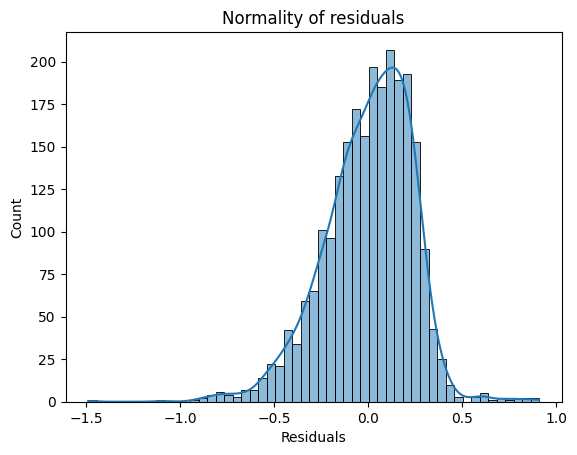

In [ ]:
# First the histogram of residuals

sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- There's definitely some normality, with exceptions on both extremes of the distribution.

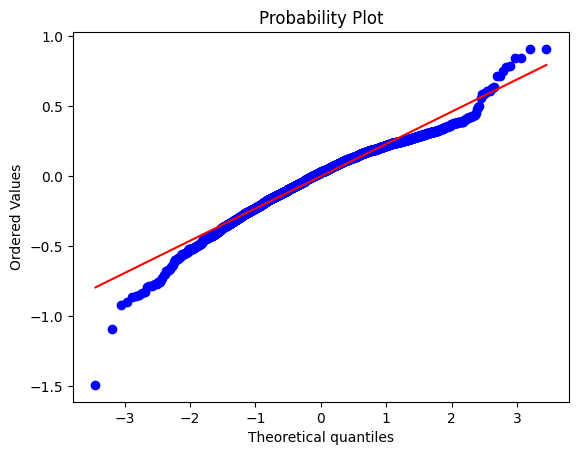

In [ ]:
# Now let's look at the Q-Q plot

import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- Here we see the residuals follow a normal distribution towards the center, but with some variance at the extremes.

In [ ]:
# Let's run the test

stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.970625638961792, pvalue=7.520647975304526e-22)

- The p-value is < 0.05, so technically speaking the residuals are not normal.
- However, as seen in the mentored learning sessions and weekly videos, some level of non-normality can be accepted. And because most of the residuals do follow a normal distribution, we're willing to accept this distribution as close to normal.

### Homoscedascity Assumption

To test heteroscedasticity, we'll use the goldfeldquandt test

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train_f1)
lzip(name, test)

[('F statistic', 1.0064444937578416), ('p-value', 0.4558476973598104)]

- The p-value is > 0.05! So the residuals are homoscedastic.

## Final Model

### Predictions

In [ ]:
# Let's see the actual predictions

pred = olsmodel_f1.predict(x_test_f1)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.396852
2341,3.696103,3.983638
1913,3.592093,3.609233
688,4.306495,4.078466
650,4.522115,5.110239
2291,4.259294,4.370564
40,4.997685,5.468065
1884,3.875359,4.017058
2538,4.206631,4.039892
45,5.380450,5.301533


- Predictions are overall pretty accurate, the actual and predicted values are close.

### The final model

In [ ]:
# Let's copy and create the final training and test sets

x_train_final = x_train_f1.copy()
x_test_final = x_test_f1.copy()

In [ ]:
# The final model

olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     837.2
Date:                   Sat, 09 Sep 2023   Prob (F-statistic):               0.00
Time:                           03:03:06   Log-Likelihood:                 82.585
No. Observations:                   2417   AIC:                            -133.2
Df Residuals:                       2401   BIC:                            -40.53
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# model performance on train set

print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.233843,0.182808,0.839498,0.838428,4.392176


In [ ]:
# model performance on test set

print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241224,0.185969,0.838669,0.836138,4.541137


- Our model can explain ~84% of the variation in the data.
- Train and Test RMSE and MAE are similar, so there are no overfitting problems.
- Based on MAPE, we can predict within 4.5% of the used prices in the testing set.

**In colclusion, the last model OLSMODEL_FINAL is a good model overall, with capabilities for both prediction and inferential statistics.**

## Actionable Insights and Recommendations

**General:**
- The model can predict ~84% of the variation and within 4.5% of the used phone/laptop prices in the test set.
- The model can be used by ReCell for the dynamic pricing strategy to predict used phone and laptop prices.

**From EDA:**
- Most brands have a standard ram of 4gb.
- Huawei and Samsung have the most devices with big screens.
- Huawei, Oppo, and Vivo have the most devices with >8mp selfie cameras.
- OnePlus, Apple, and Google have the highest average used price.
- Celkon, Lava, Micromax, Karboon, and Spice have the lowest average used price.-  iOS devices have the highest average used price. Followed by Android, Windows, and Others.

**Numerical Variables:**
- If the normalized new price increases by 1 unit, the used price will increase by 0.4375 units, all other variables held constant. All interpretation depends on the actual units, but since these are normalized prices, one could conclude that the new price afects the used price by almost 45%.

- If the megapixels of the main camera increase by 1 unit, the used price will increase by 0.0205 units, all other variables held constant.

- If the selfie camera megapixels increase by 1 unit, the used price will increase by 0.0137 units, a bit lower than main camera mp, all other variables held constant.

- If the ram increases by 1 unit, the used price will increase by 0.0195 units, all other variables held constant.

- If the weight increases by 1 unit, the used price will increase by 0.0017 units, all other variables held constant.

- If the years since release increase by 1 unit, the used price will decrease by 0.-0.0303 units, all other variables held constant. This is expected since older devices tend to have lower prices.

**Categorical:**
All dummy variables are compared against brand_name_Acer, os_android, 4g_no, and 5g_no.

- Generally, the used price for devices from LG, Micromax, Samsung, Sony, and others, will be ~(-)0.05 units less than those from Acer.

- On the contrary, if the device is from Xiaomi, the used price will be 0.0771 units more than those from Acer.

- In general, devices with operative systems different from Android will have lower used prices. -0.0994, and -0.1417 for iOS and Others, respectively. iOS devices have a higher average price compared to the rest of OS, however, the number of iOS devices in the data is significantly lower compared to Android devices. So it didn't provide enough information for prediction. Also, Android devices have more variety. Those devices can have much higher ram, main camera mp, selfie camera mp, and weight, and therefore the used price can be higher.

- Devices that have 4g will have a used price 0.0458 units higher than those that don't have 4g.
- Whether devices have 5g or not, is not a relevant variable when predicting used price.

**Recommendations:**

- The most important variable when predicting used device price is the new device price, therefore, ReCell must track this variable as reliably as possible to make sure the predictions on used prices are as reliable as possible.

- Certain brands do have an impact on the used price, and it will be used in the dynamic pricing strategy, but more than just the brand, the main variables to be tracked are actually the ram, megapixels in the cameras, weight, and how old the device is. Make sure these variables are tracked properly. These will have the highest impact on the used price, besides the new price.

- Despite the model not being able to predict ~16% of the variance, the fact is there are no signs of underfitting or overfitting, therefore is a very good model for prediction.

- Besides pricing, ReCell should aim to develop a dynamic demand strategy. With both the pricing and demand strategy, ReCell could assign prices depending on the expected demand too, and maximize profits.

- Devices without 4g can definitely be expected to have a lower price compared to those with 4g, but not so much with those that have 5g vs the ones that don't. This could probably change in the future with more 5g adoption, so it must be re-tested later.

___